# Mervyn Chan 2019 Sept 7th
## This page shows the results of a k-fold cross validation analysis for a convolutional neural network (CNN) trained on 1758 magneto-rotational supernova waveforms from
### https://zenodo.org/record/201145#.XGNwkXUzbCL
## and 26 neutrino driven waveforms from
### https://sntheory.org/ottetal2013

### https://sntheory.org/murphyetal2009

### https://sntheory.org/ott2009

## The detectors are : advanced LIGO, Hanford, advanced LIGO, Livingston, advanced VIRGO,  KAGRA

## The network was trained to classify which class among "Neutrino-driven, Magneto-rotational, Background" the input data belonged to.

## Data generation procedure
### 1. 1758 magnetorational waveforms and 26 neutrino waveforms were used.
### 2. These original waveforms were first passed through a low filter to filter out low frequency component (< 11 Hz).
### 3. A tukey window with alpha = 0.08 was then applied to every waveform.
### 4. The waveform with the longest length was then identified, each of the rest waveforms was zero-padded to this length.
### 5. 26 neutrino waveforms were then duplicated 67 times so that the number of them was roughly equal to the number of magnetorotational waveforms.
### 6. 1758 magnetorotational waves + 1742 neutrino waveforms = 3500 waveforms.
### 7. Since some of the studies provide only h+, while the others provide h+ and hx, the above 3500 waveforms contain both h+, hx. For 
###    studies that provide only h+, a vector of zeros of the same length is provided as hx.     
### 8. 120,000 noise realisations were generated for each detector in a network of 4 detectors: H L V K, each of which was 1.7 times as long as the waveforms.
### 9. The 3500 waveforms (h+ and hx) were then duplicated 23 times making them 80500 in total.
### 9. 80500 sky locations were randomly chosen , and the antenna patten of each detector at those 80500 sky locations as well as the time delay between the detectors were computed.
### 10. The antenna pattens and time delays were then applied to the 80500 waveforms respectively. 
### 11. After step No. 10, 80500 of h(t) = Fp * hp + Fx * hc for each detector at different locations were obtained. 
### 12. 80500 h(t) samples were added to 80500 of the 120,000 noise realisations, where the starts of the signals were randomised. 
###     For one sample, each detector had the same starting index in the corresponding noise realisation vector, this should not affect the time delay information, which had already been applied to prior to the addition.
### 13. For each source, the h(t) for each of the detectors was then combined to form the training/validation/testing samples of the shape (K X 1 X 8936), where K is the number of detectors. 
### 14. This means the number of time series were used as the number of channels.
### 15. When the CNN finished training for one distance, it would start training for the next distance. 
### 16. When training for a distance, the waveforms between step No. 7  and No. 8 were scaled according to the distance, the rest of the steps were repeated.

# Training
### The training process was similar to what had been previously done.
### A 10 fold cross validation analysis was carried out for each distances of 10, 20, 30, 40, 50, 80, 100, 150, 200 kpc.
### When the CNN had finished training for 1 distance, it would turn to the next distance by doing step No. 16 defined above.
### Some of the training parameters:
### 1. epochs: 30, batch size :32, learning rate = 0.0001
### Results
### Figure 1. Efficiency curves with fixed threshold for all tested distances.
### Figure 2. Efficiency curves with fixed false alarm rate all tested distances.
### Figure 3. Log-scaled Roc curves for all tested distances.
### Figure 4. Roc curves for all tested distances.
### Figure 6 to Figure 14. Confusion matrix for all tested distances.
### Figure 15 to Figure 23. Loss plots for all tested distances.


In [1]:
import Image
from IPython.display import display
import matplotlib.pyplot as plt

## Figure 1. Efficiency curves with fixed threshold for all tested distances.


### This plot shows the efficiency curve as a function of distances if the threshold is set to be a constant.
### This threshold is used when CNN tries to determine what class the input belongs to.
### When training a CNN to determine the class of an input, the output is probabilities that the input belongs to each of the classes.
### For the CNN to determine that an input belongs to a class, the corresponding probability has to be larger than a threshold. 
### In this case, the threshold is 50%.

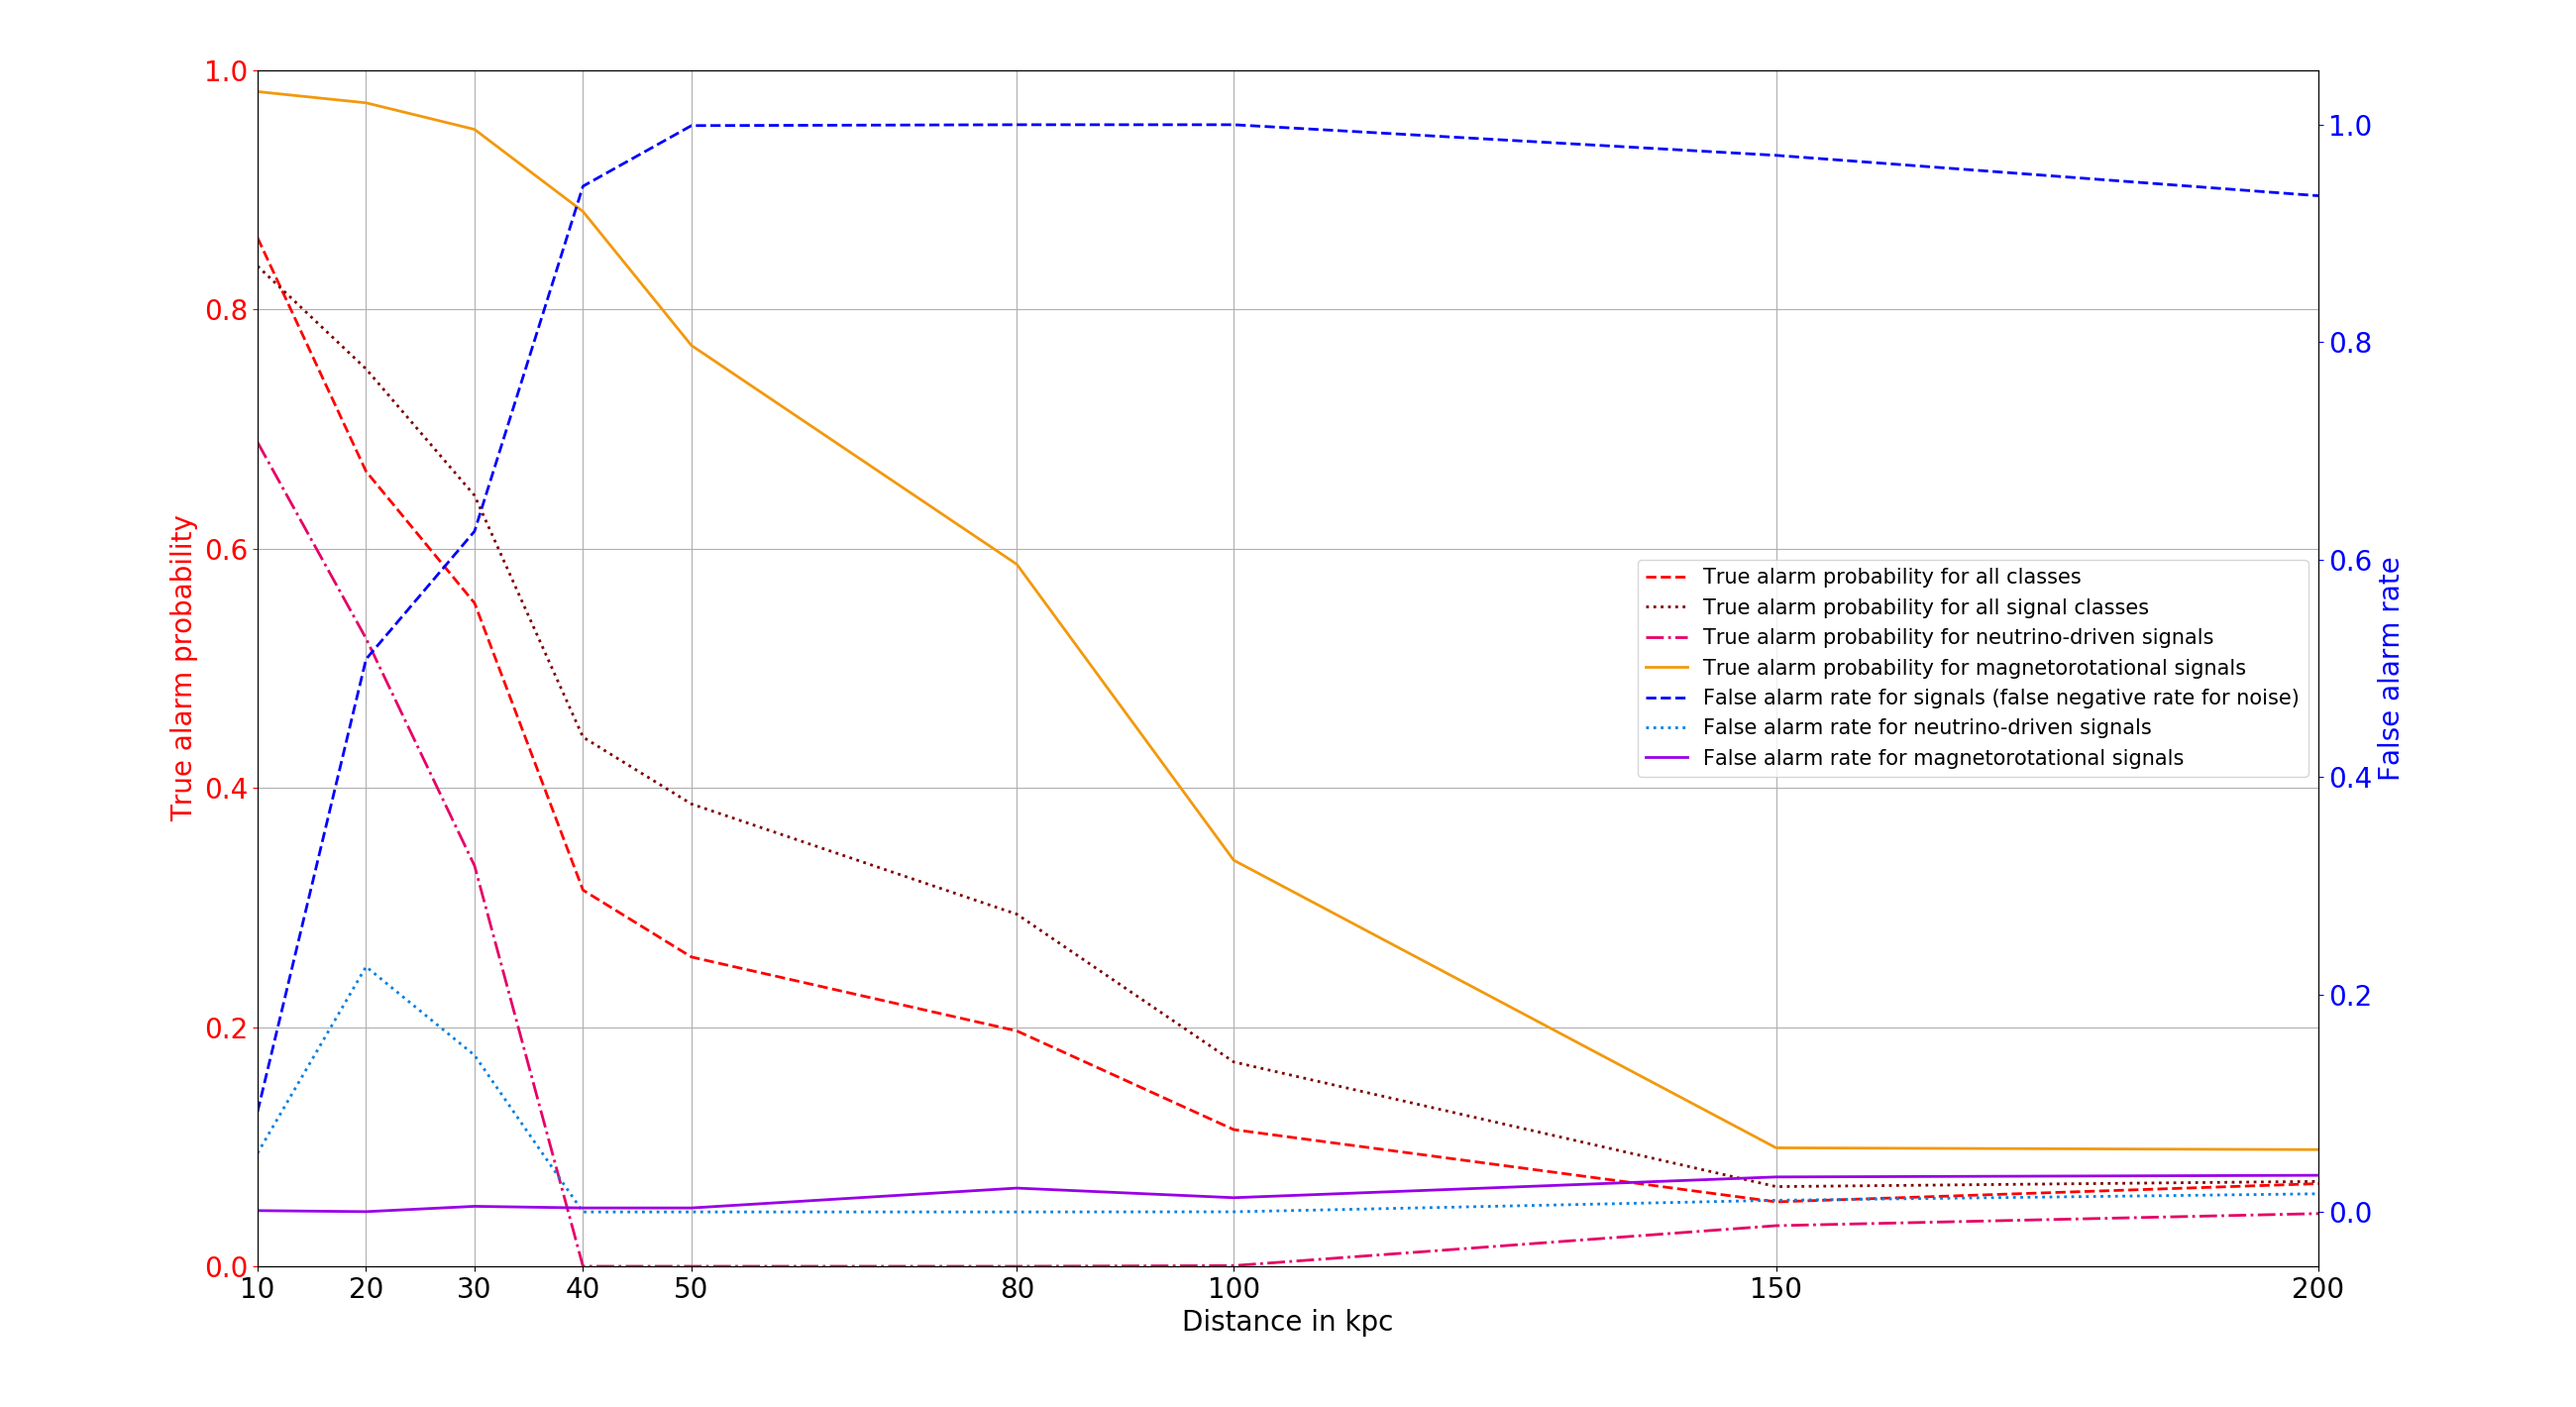

In [2]:
image = Image.open('ROC_with_fixed_threshold_HLVK-dist.png')
image

## Figure 2. Efficiency curves for all tested distances .
### Since there are now three classes of data, the efficiency curves should be viewed as one class versus the rests.
### i.e.: solid lines are for class "Neutrino-driven" verse classes "background or Magneto-rotational", while
### dashed lines are for class "Magneto-rotational" verse classes "background or Neutrino-drive".

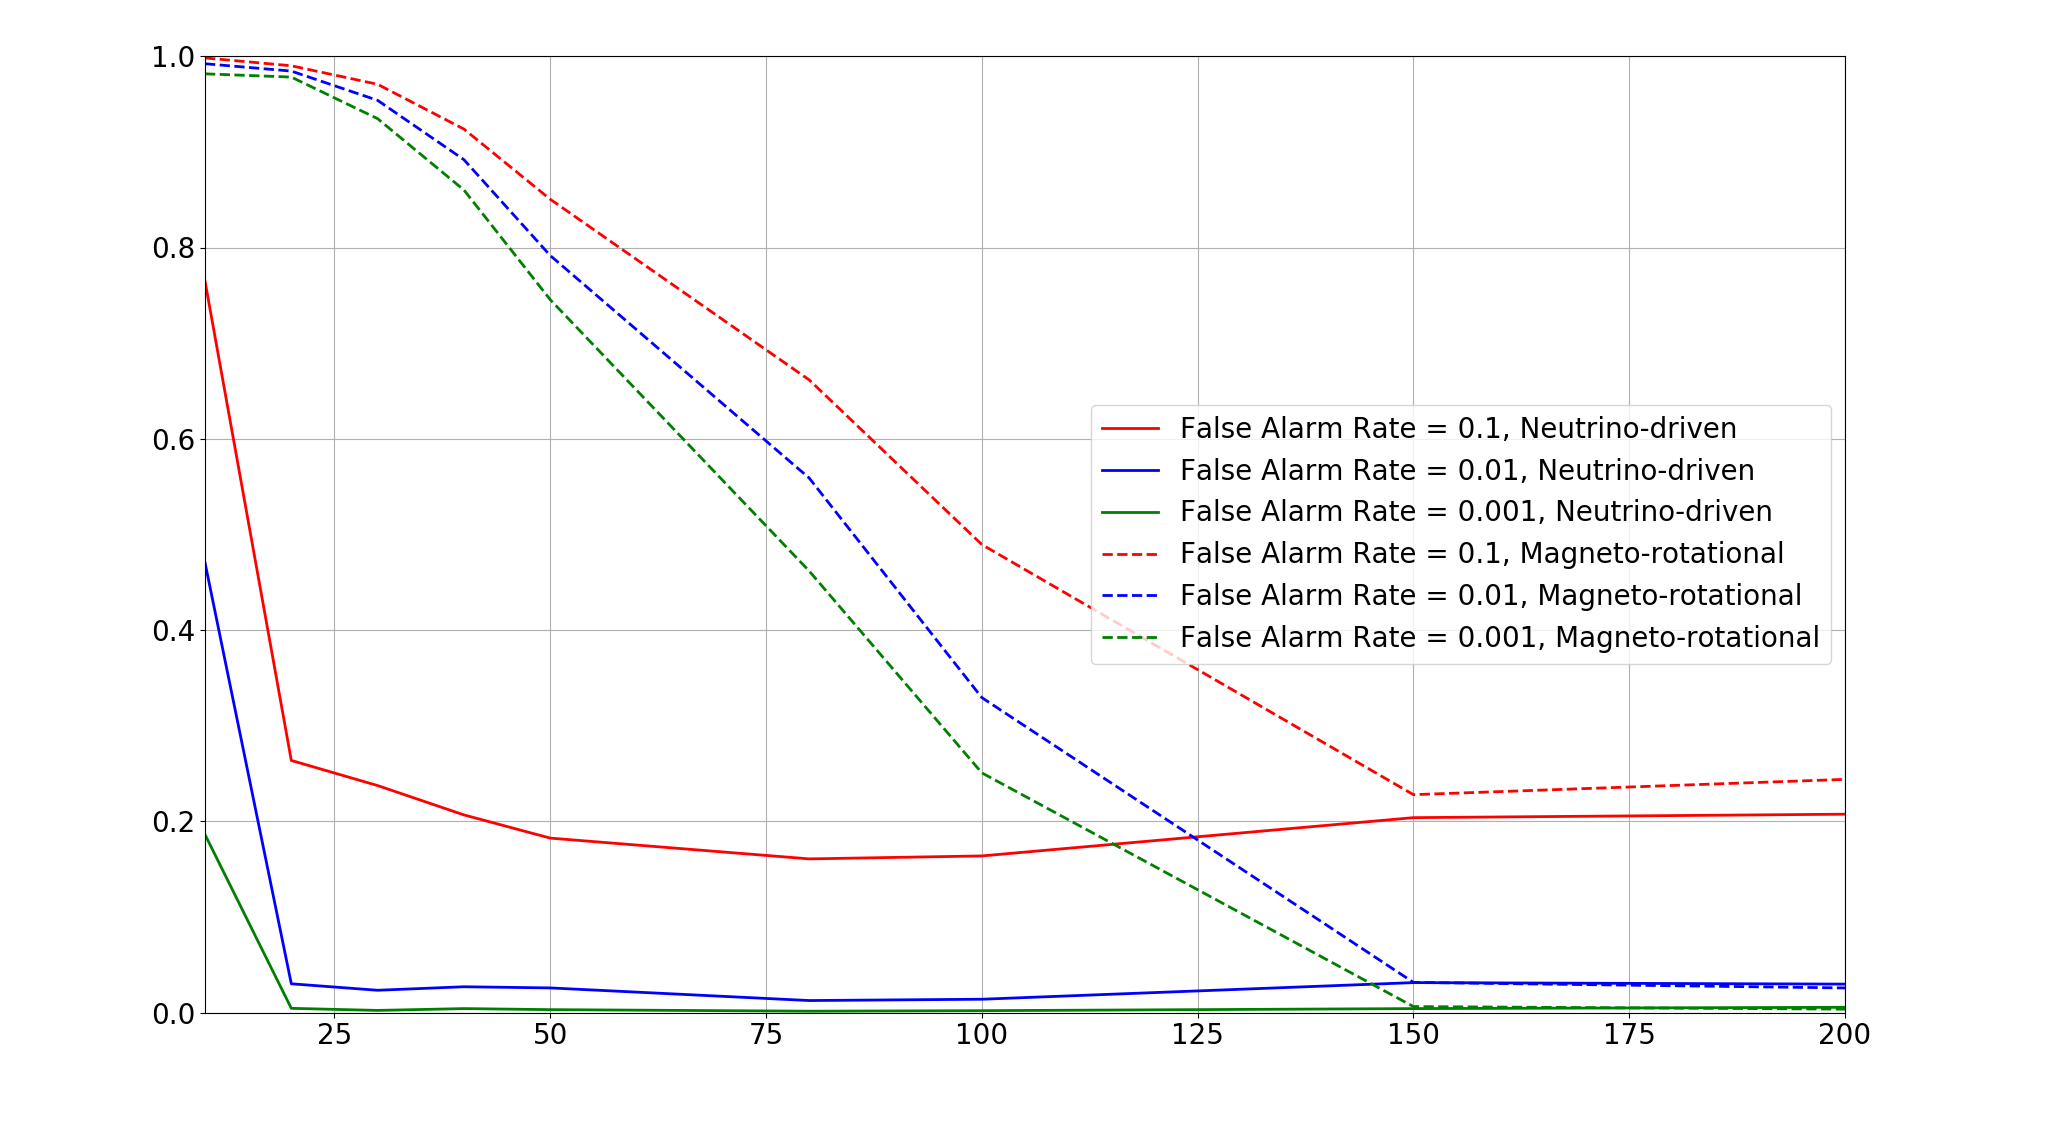

In [3]:
image = Image.open('efficiency_curves_for_HLVK-dist.png')
image

## Figure 3. ROC curves for all tested distances, log-scale.
### Again, since there are three classes, each of the curves should be viewed as one class versus the others.
### Again, solid lines are for class "Neutrino-driven" verse classes "background or Magneto-rotational" and
### dashed lines are for class "Magneto-rotational" verse classes "background or Neutrino-drive".

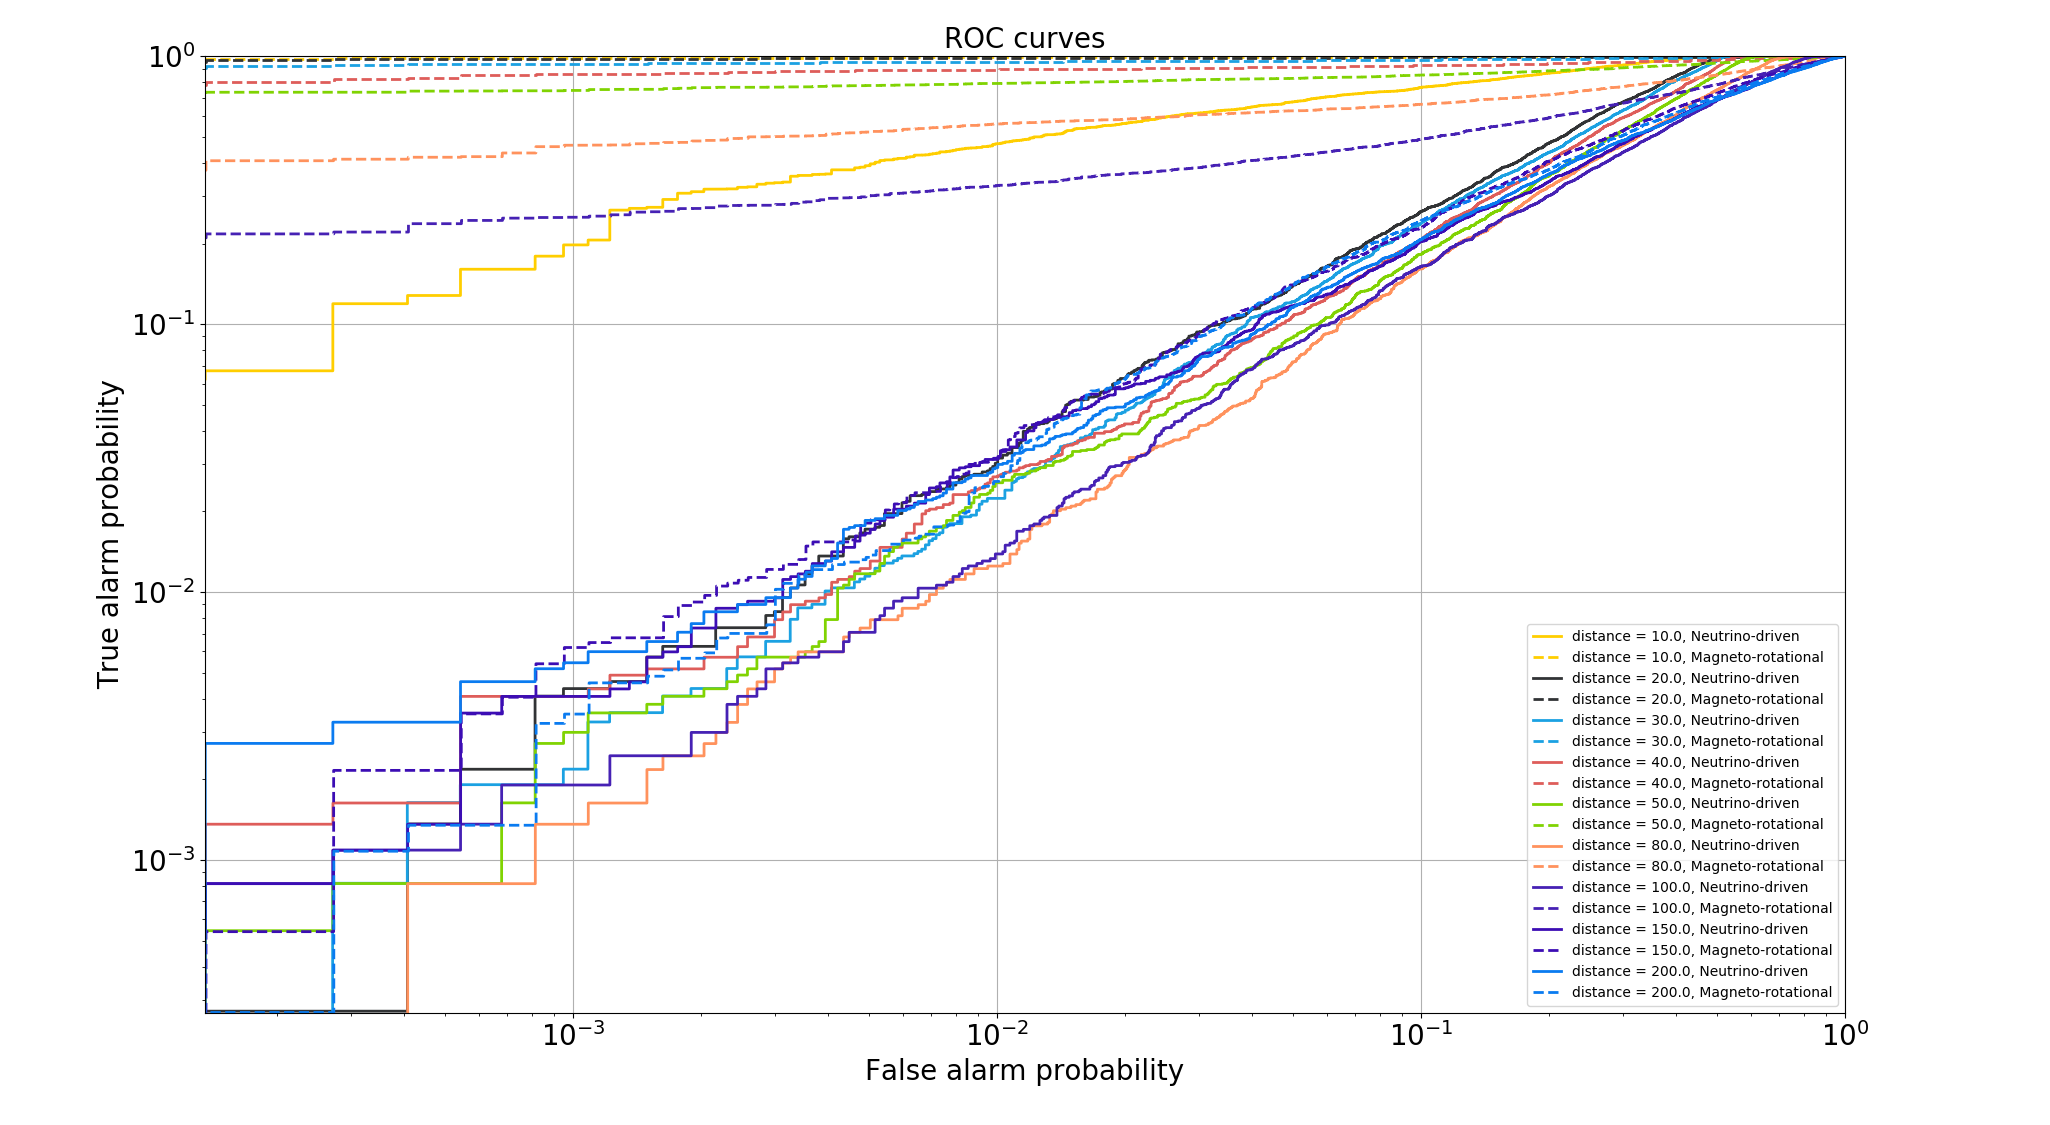

In [4]:
image = Image.open('ROC_curves_log_scale_for_TN_HLVK-dist.png')
image

## Figure 4. ROC curves for all tested distances


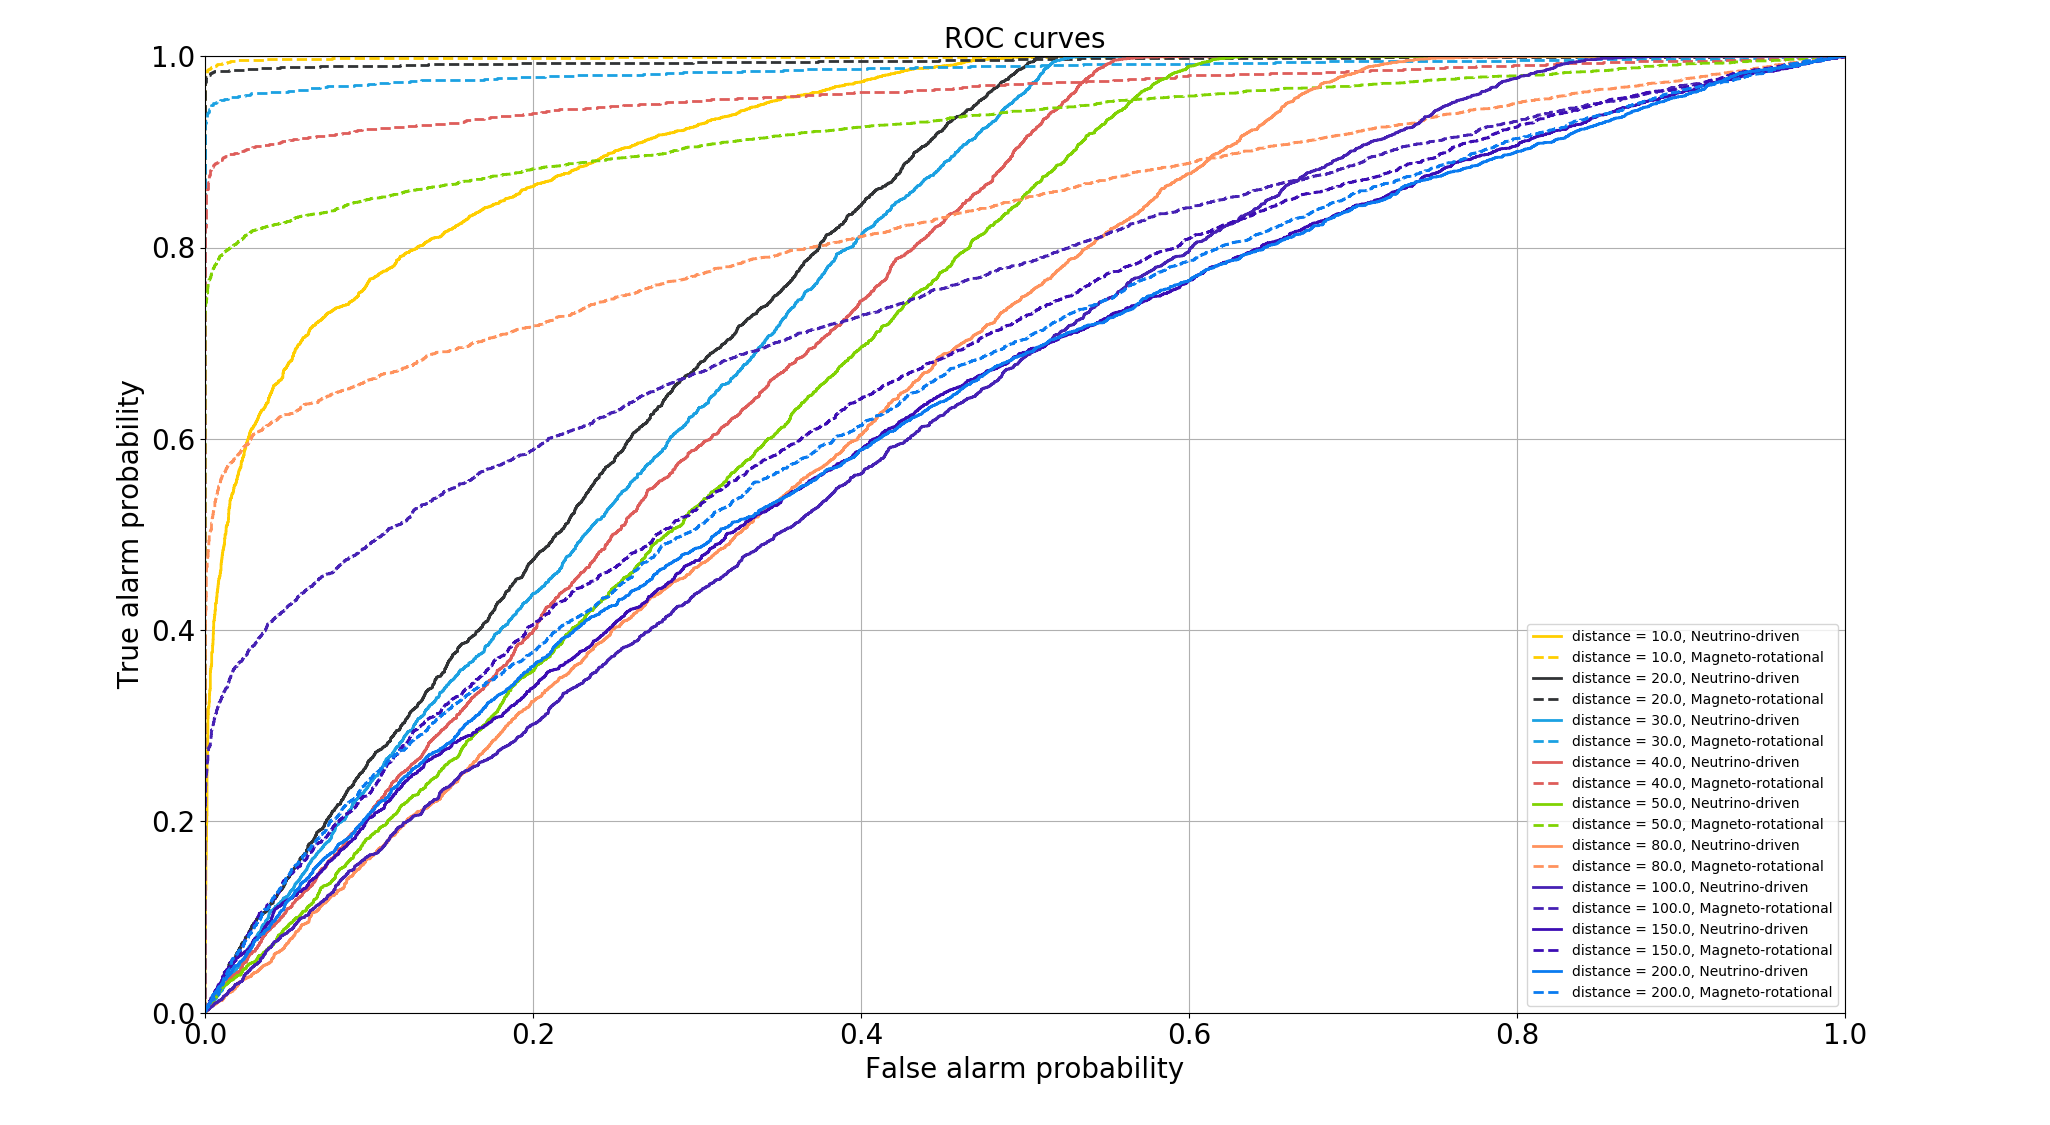

In [5]:
image = Image.open('ROC_curves_for_TN_HLVK-dist.png')
image

## Figure 6. Confusion matrix for distance = 10kpc

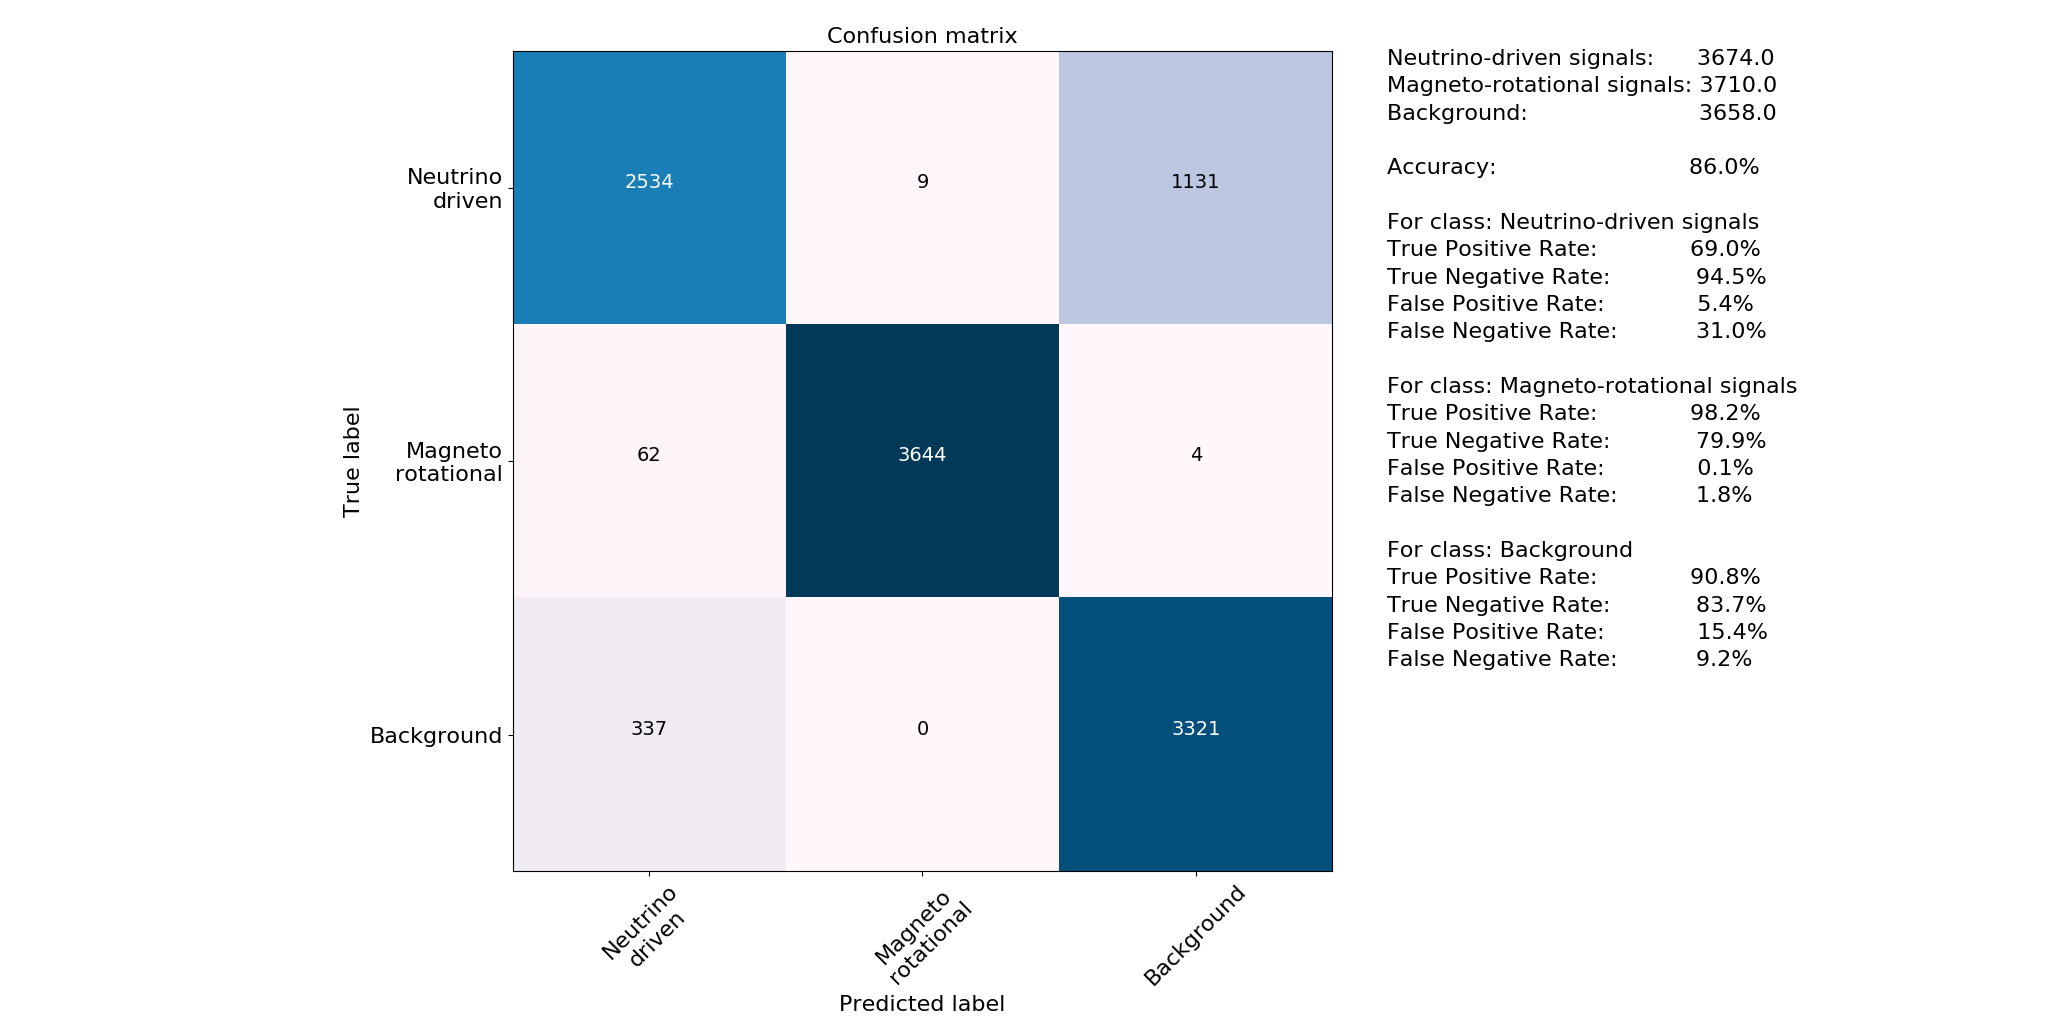

In [6]:
image = Image.open('Confusion_matrix_for_distance_10.0_HLVK-dist.png')
image

## Figure 7. Confusion matrix for distance = 20kpc

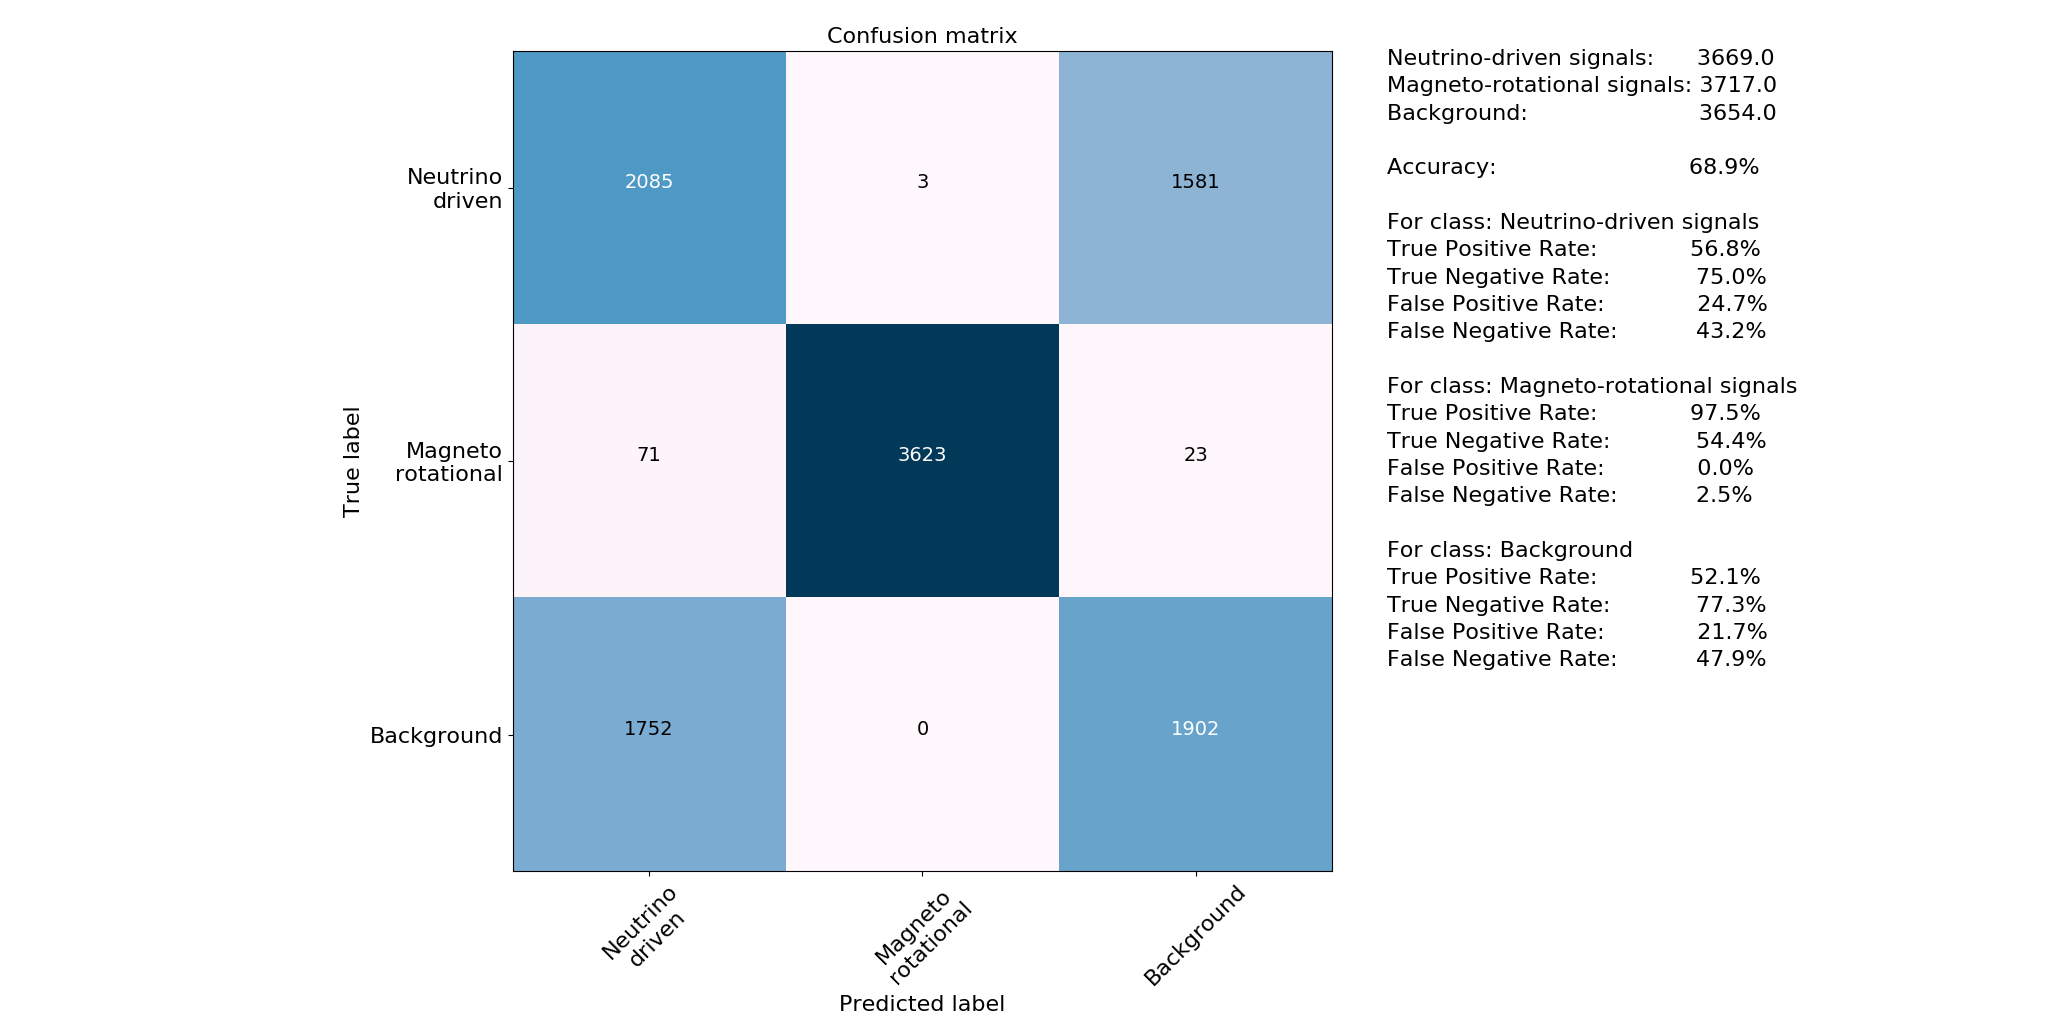

In [7]:
image = Image.open('Confusion_matrix_for_distance_20.0_HLVK-dist.png')
image

## Figure 8. Confusion matrix for distance = 30kpc

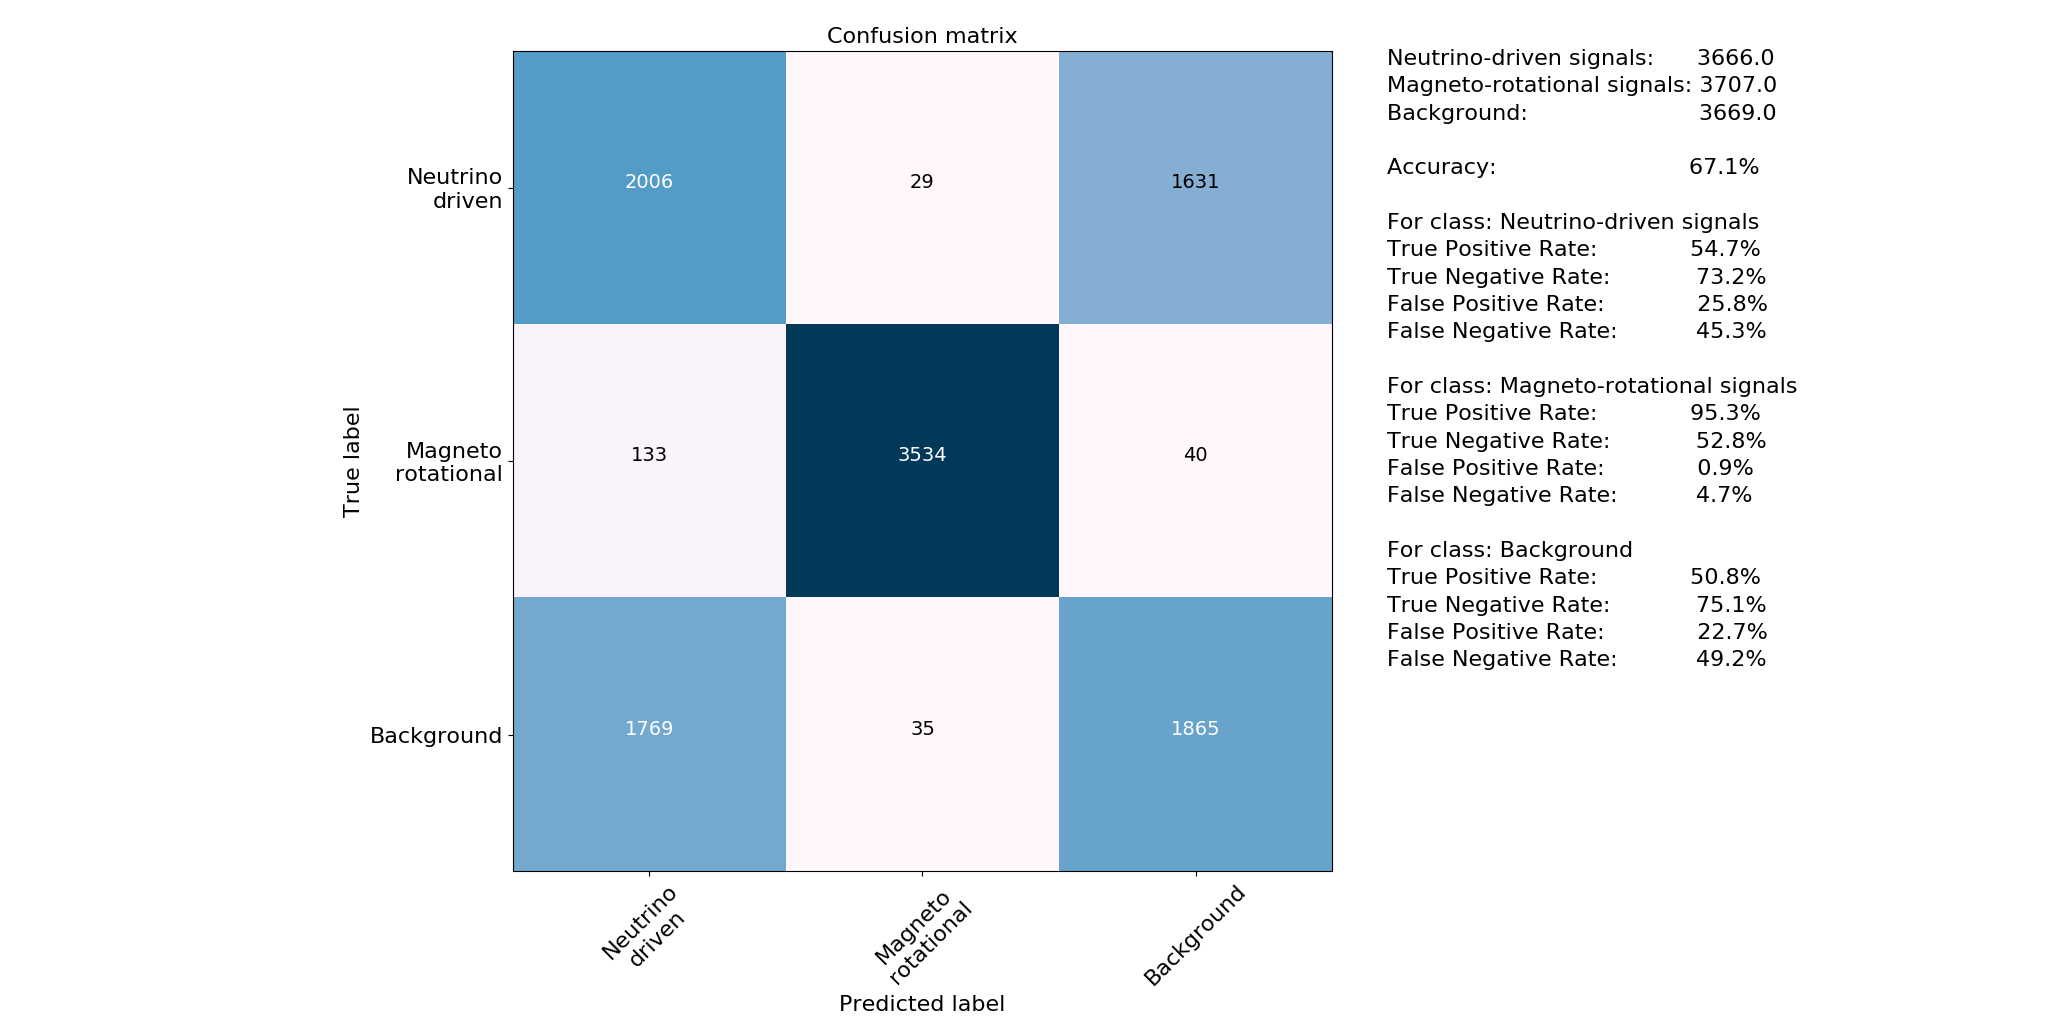

In [8]:
image = Image.open('Confusion_matrix_for_distance_30.0_HLVK-dist.png')
image

## Figure 9. Confusion matrix for distance = 40kpc

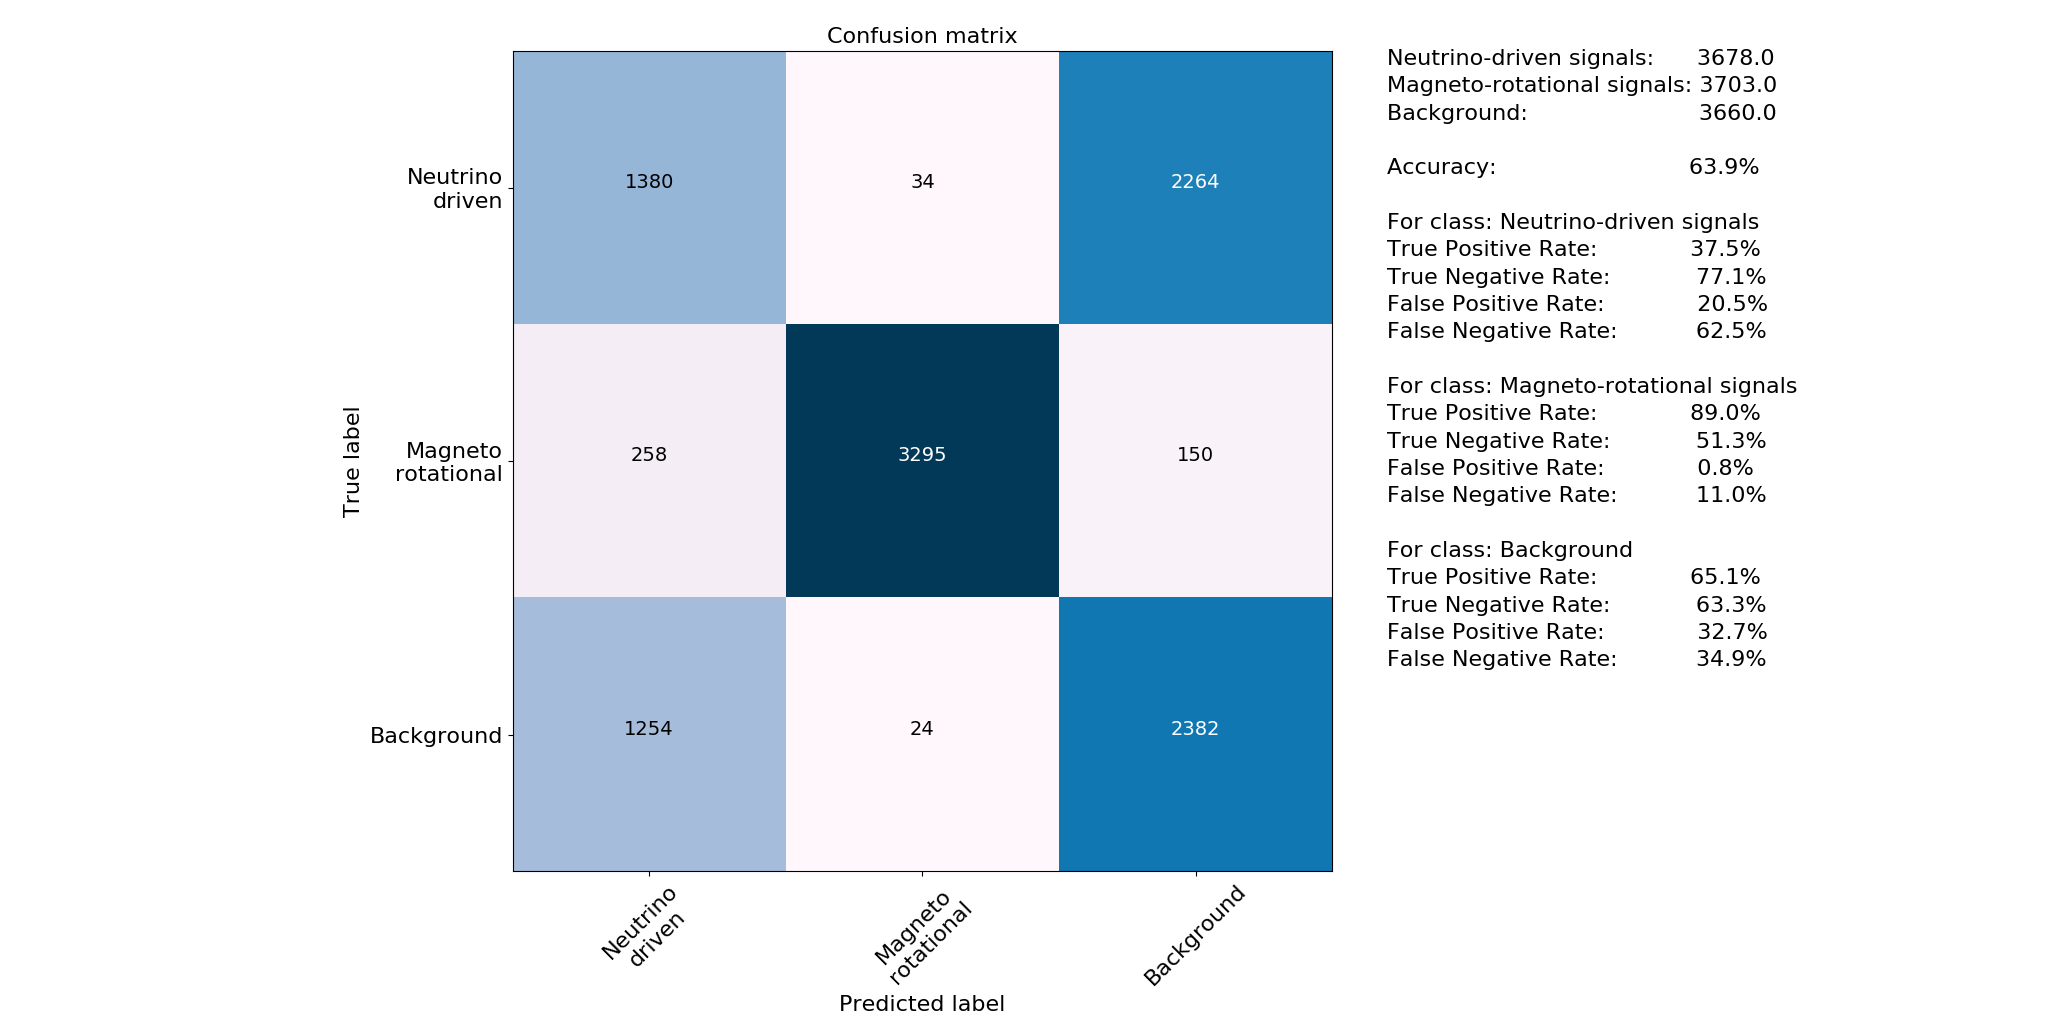

In [9]:
image = Image.open('Confusion_matrix_for_distance_40.0_HLVK-dist.png')
image

## Figure 10. Confusion matrix for distance = 50kpc

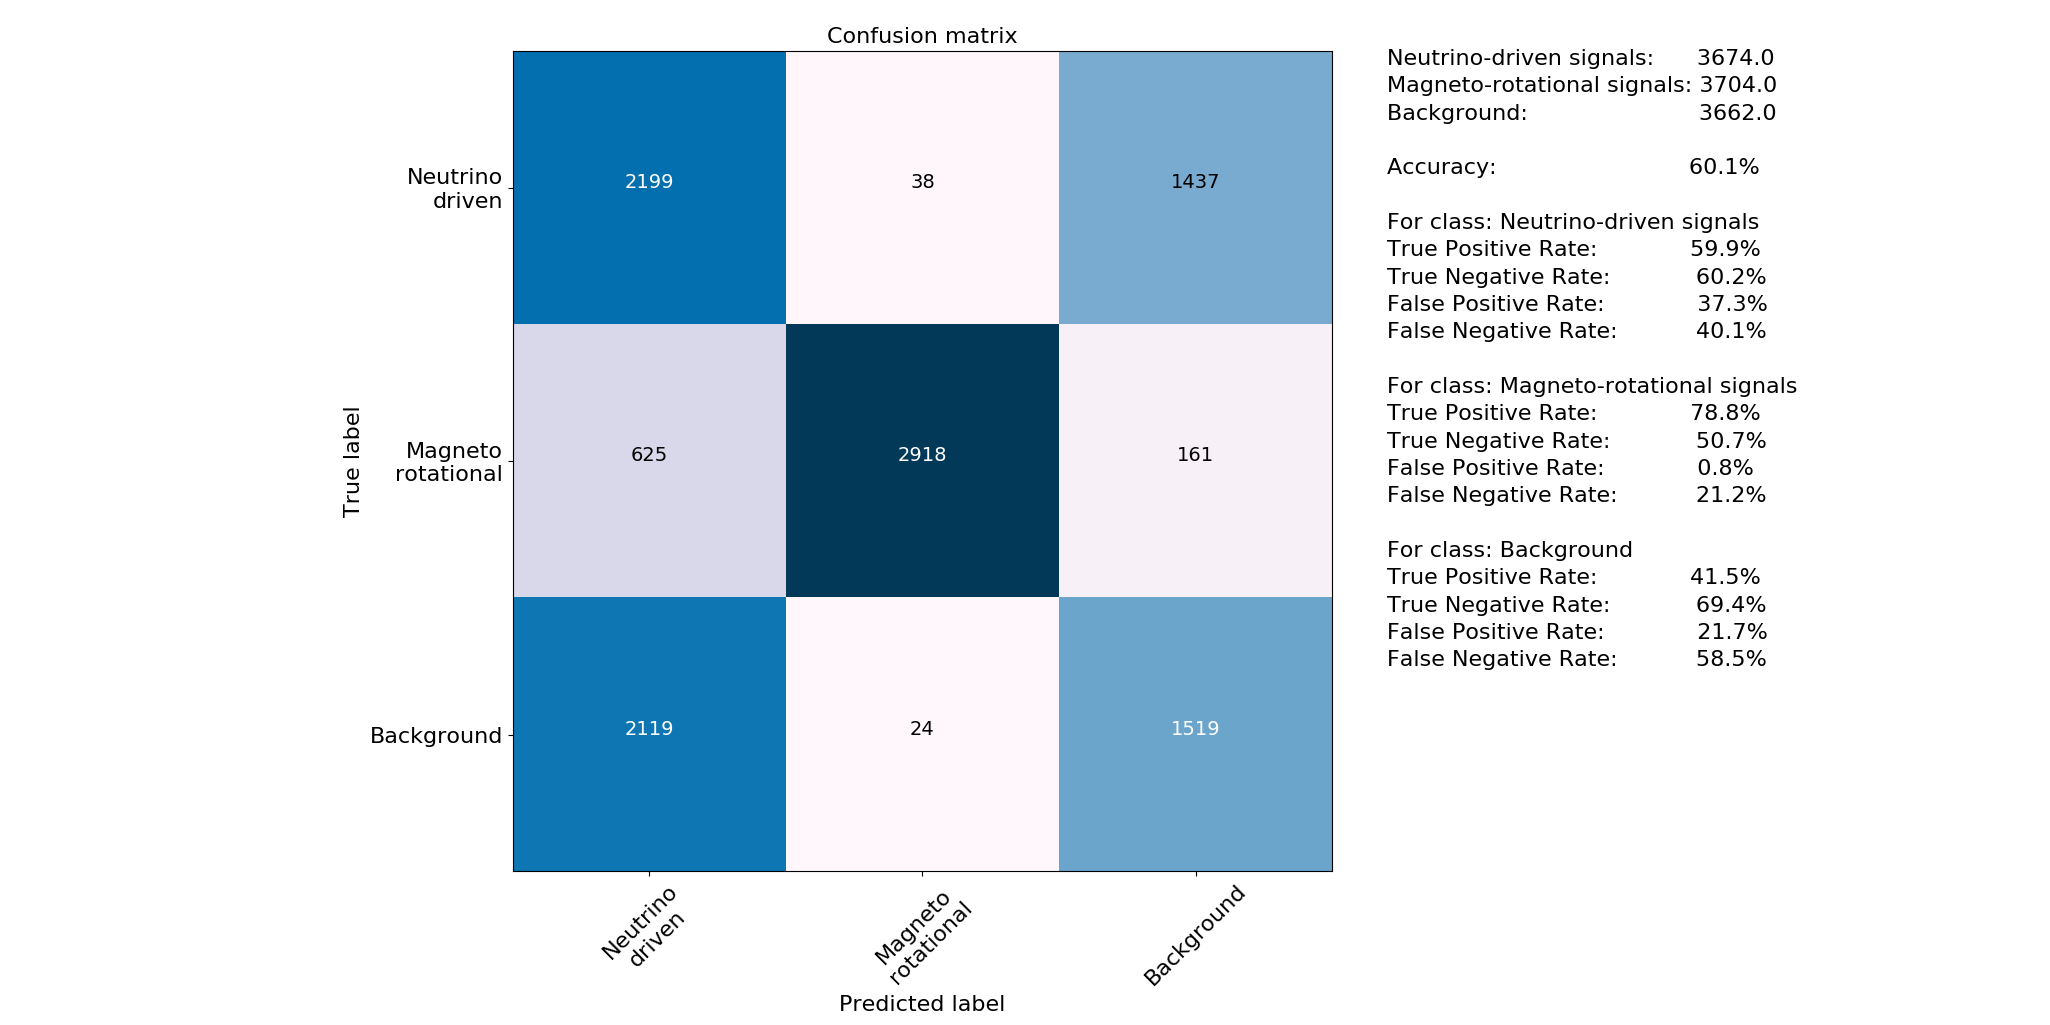

In [10]:
image = Image.open('Confusion_matrix_for_distance_50.0_HLVK-dist.png')
image

## Figure 11. Confusion matrix for distance = 80kpc

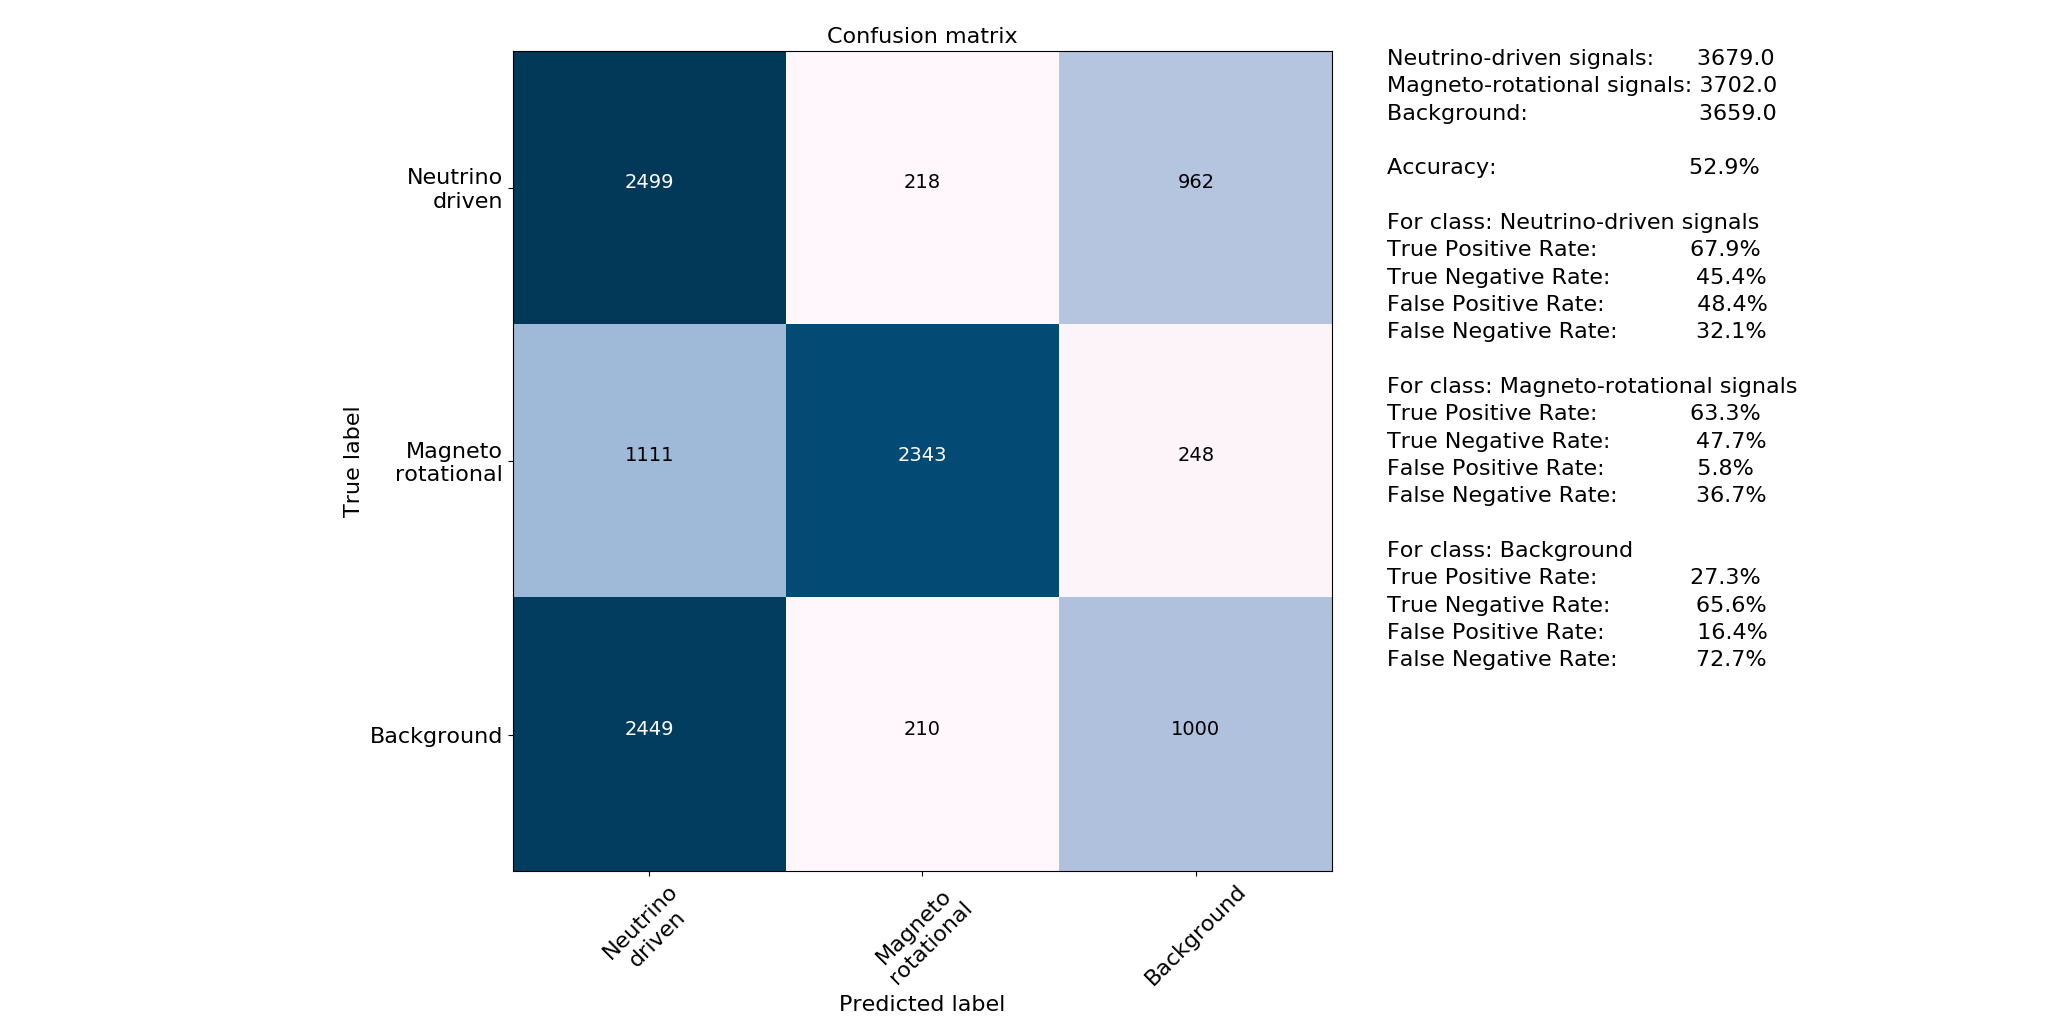

In [11]:
image = Image.open('Confusion_matrix_for_distance_80.0_HLVK-dist.png')
image

## Figure 12. Confusion matrix for distance = 100kpc

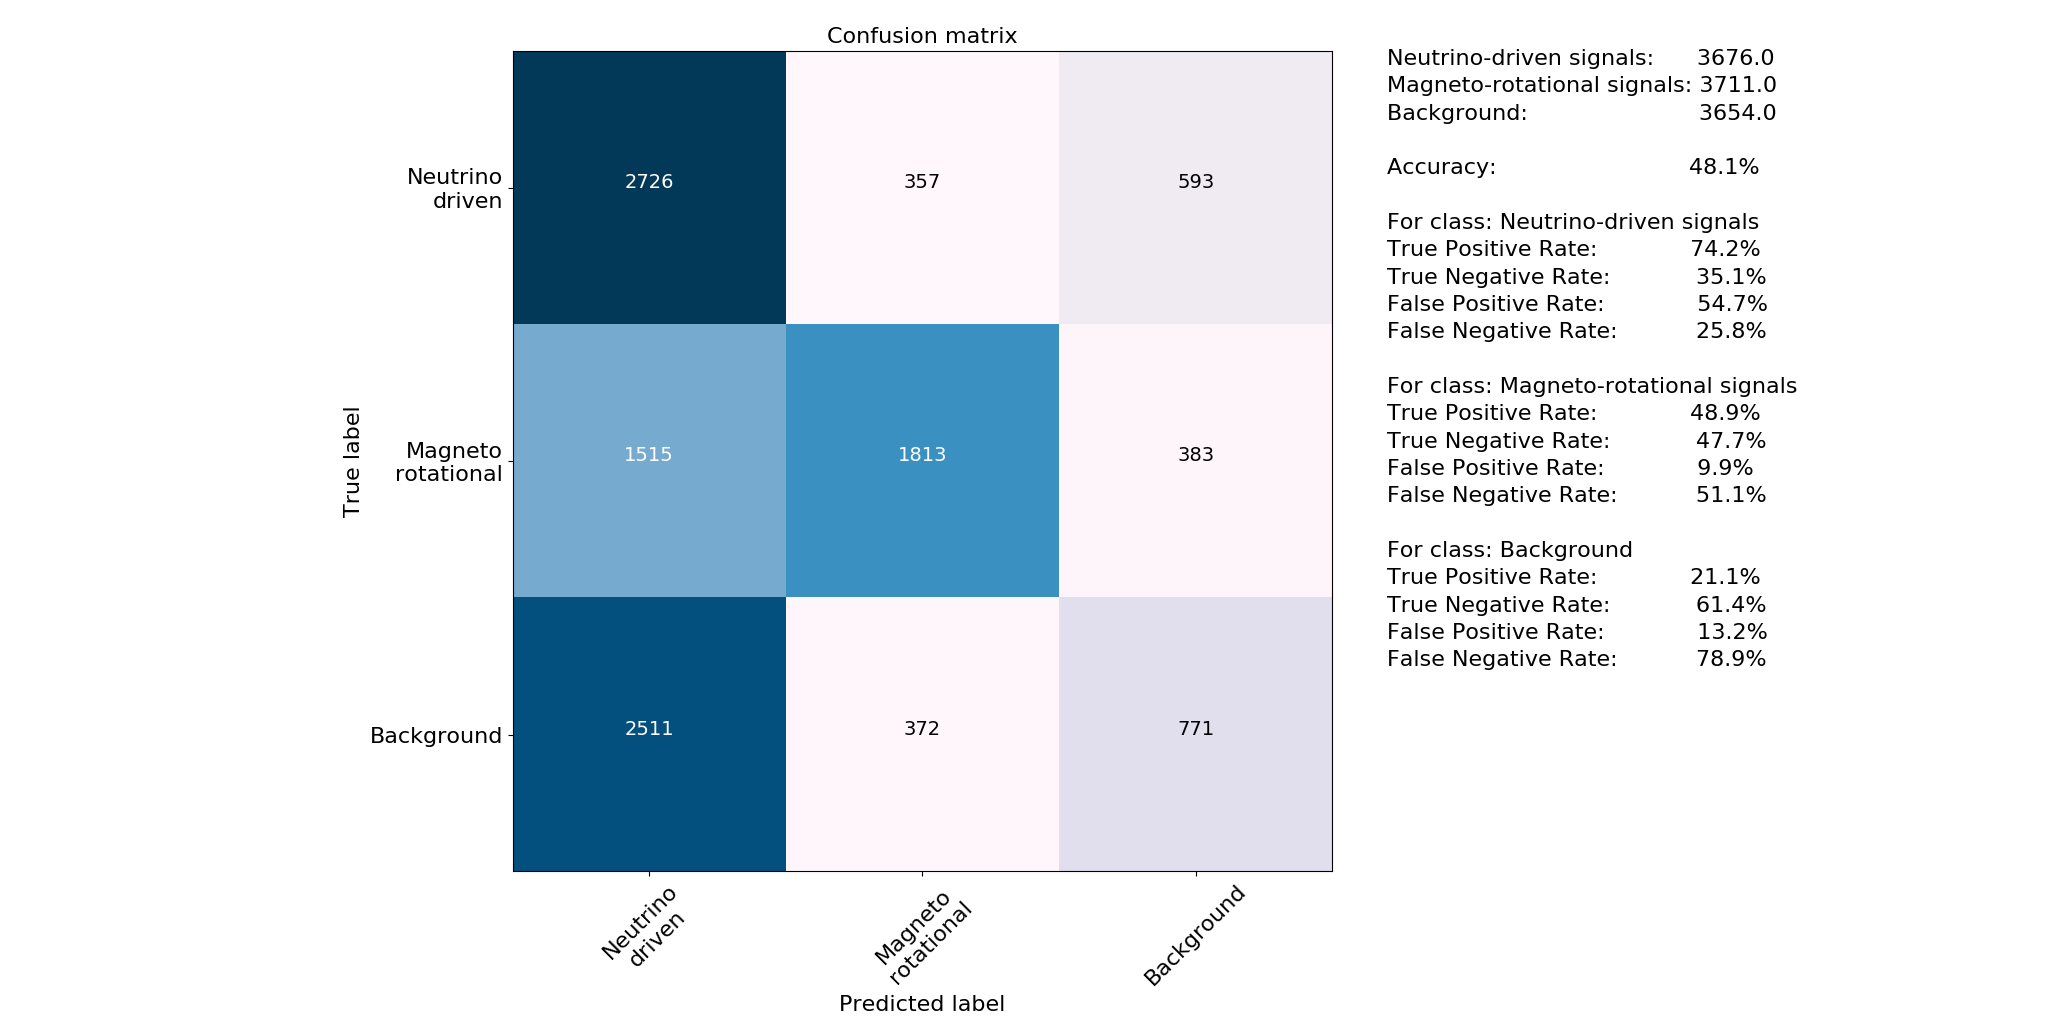

In [23]:
image = Image.open('Confusion_matrix_for_distance_100.0_HLVK-dist.png')
image

## Figure 13. Confusion matrix for distance = 150kpc

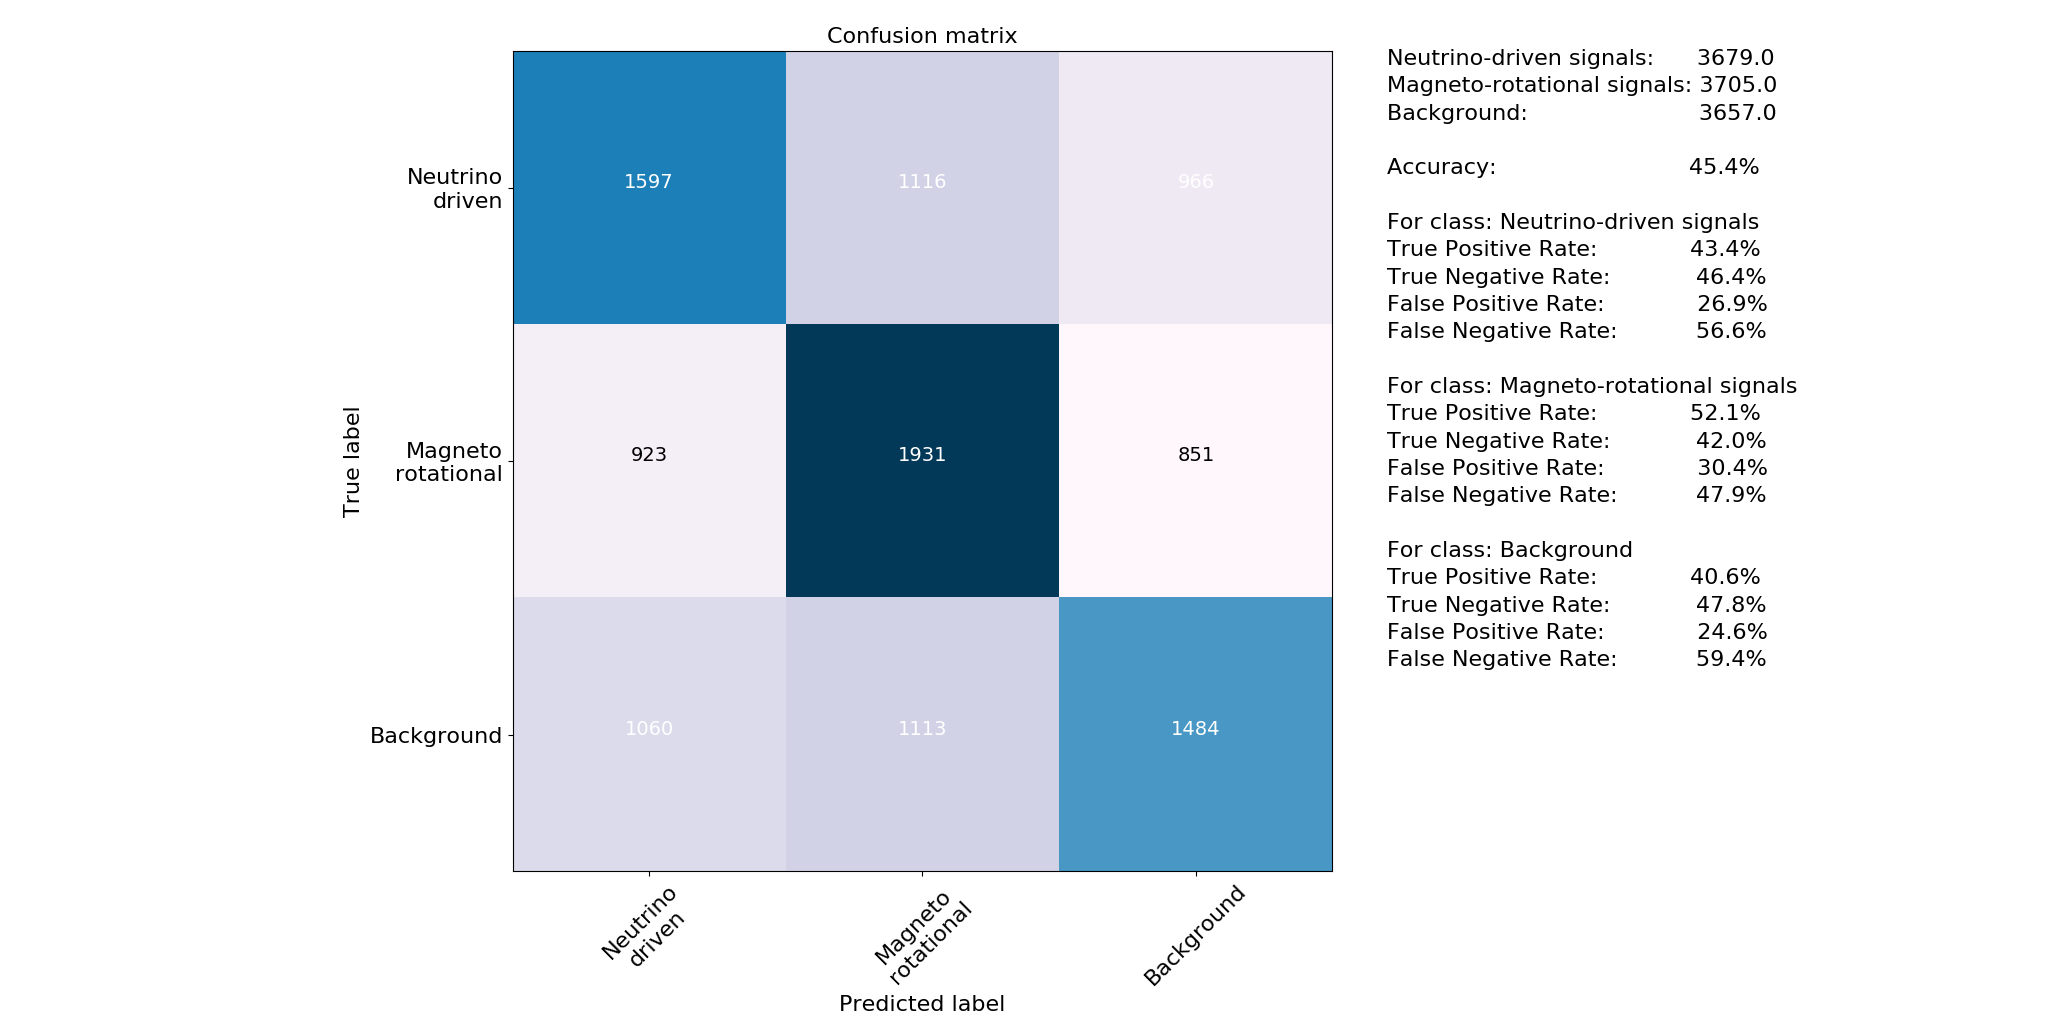

In [24]:
image = Image.open('Confusion_matrix_for_distance_150.0_HLVK-dist.png')
image

## Figure 14. Confusion matrix for distance = 200kpc

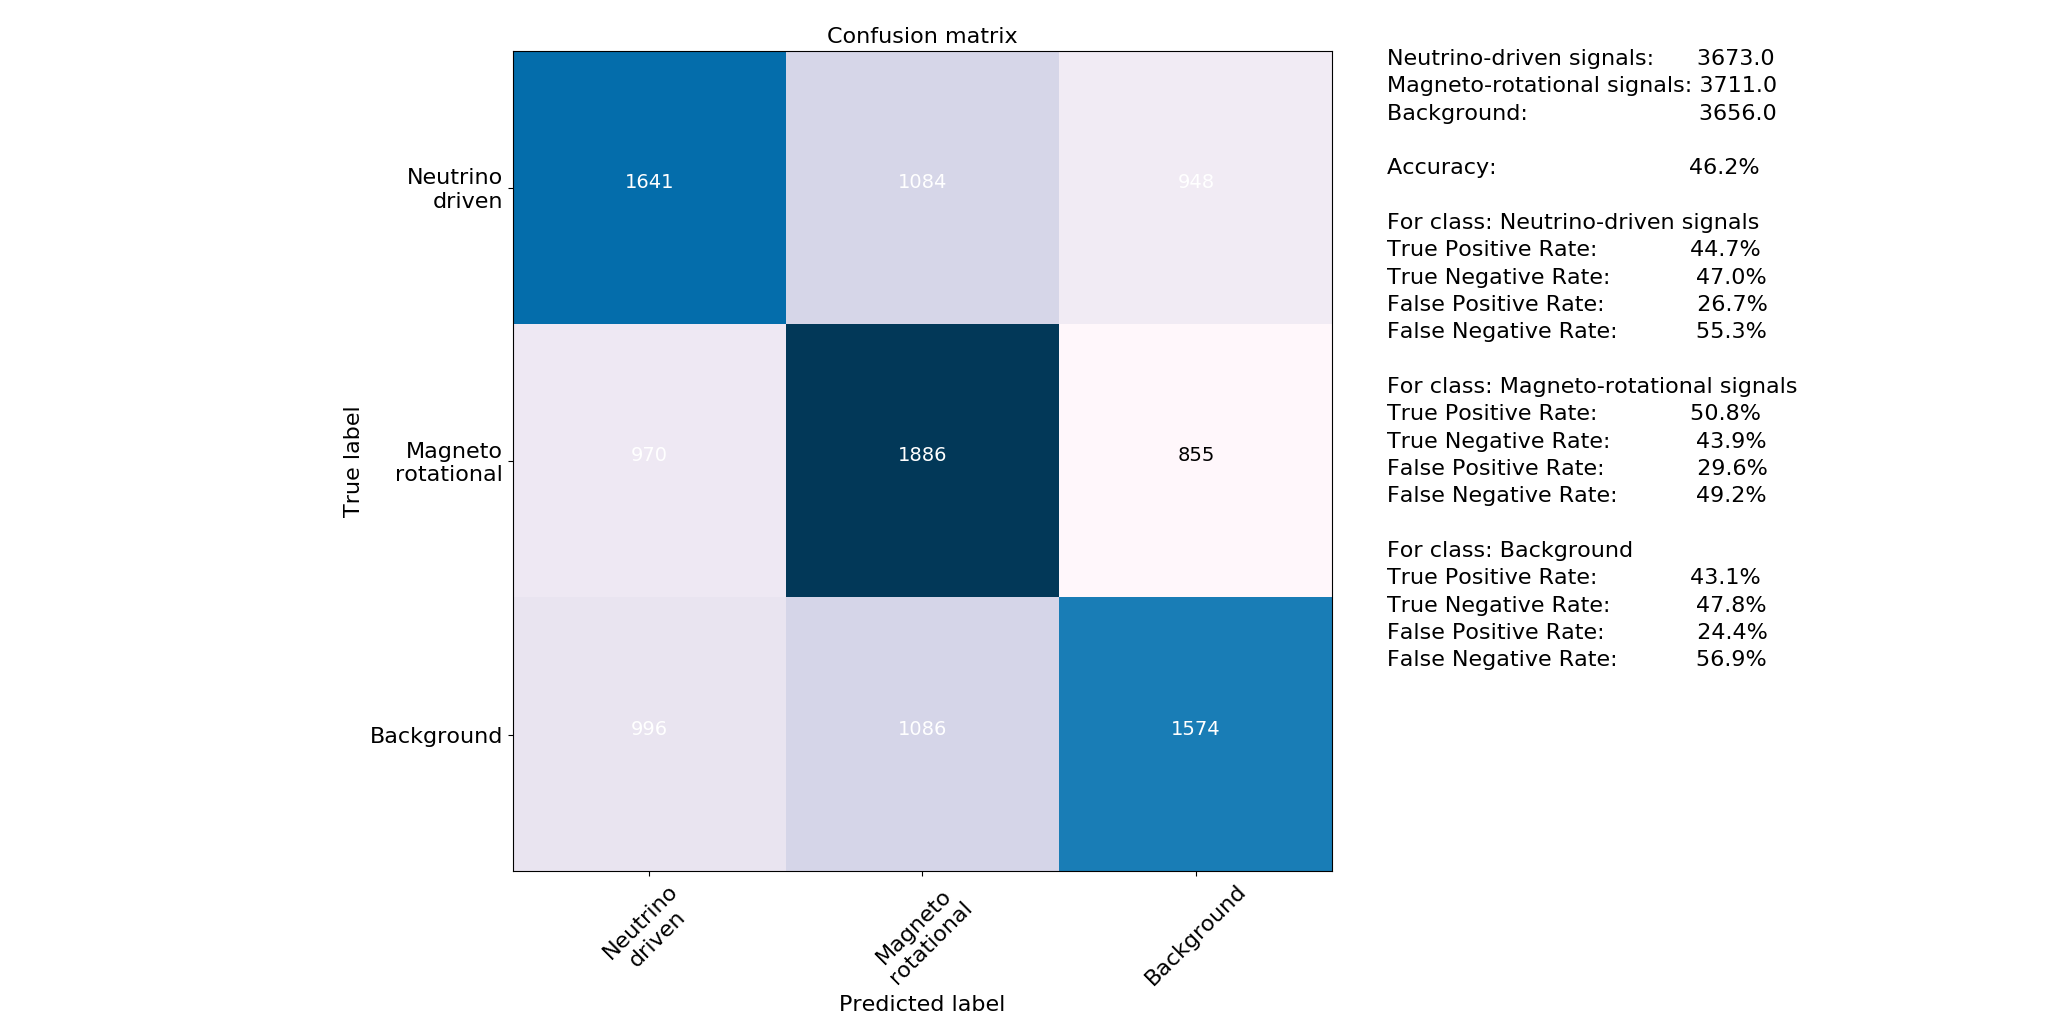

In [25]:
image = Image.open('Confusion_matrix_for_distance_200.0_HLVK-dist.png')
image

# Figure 15. Loss plot for distance = 10kpc


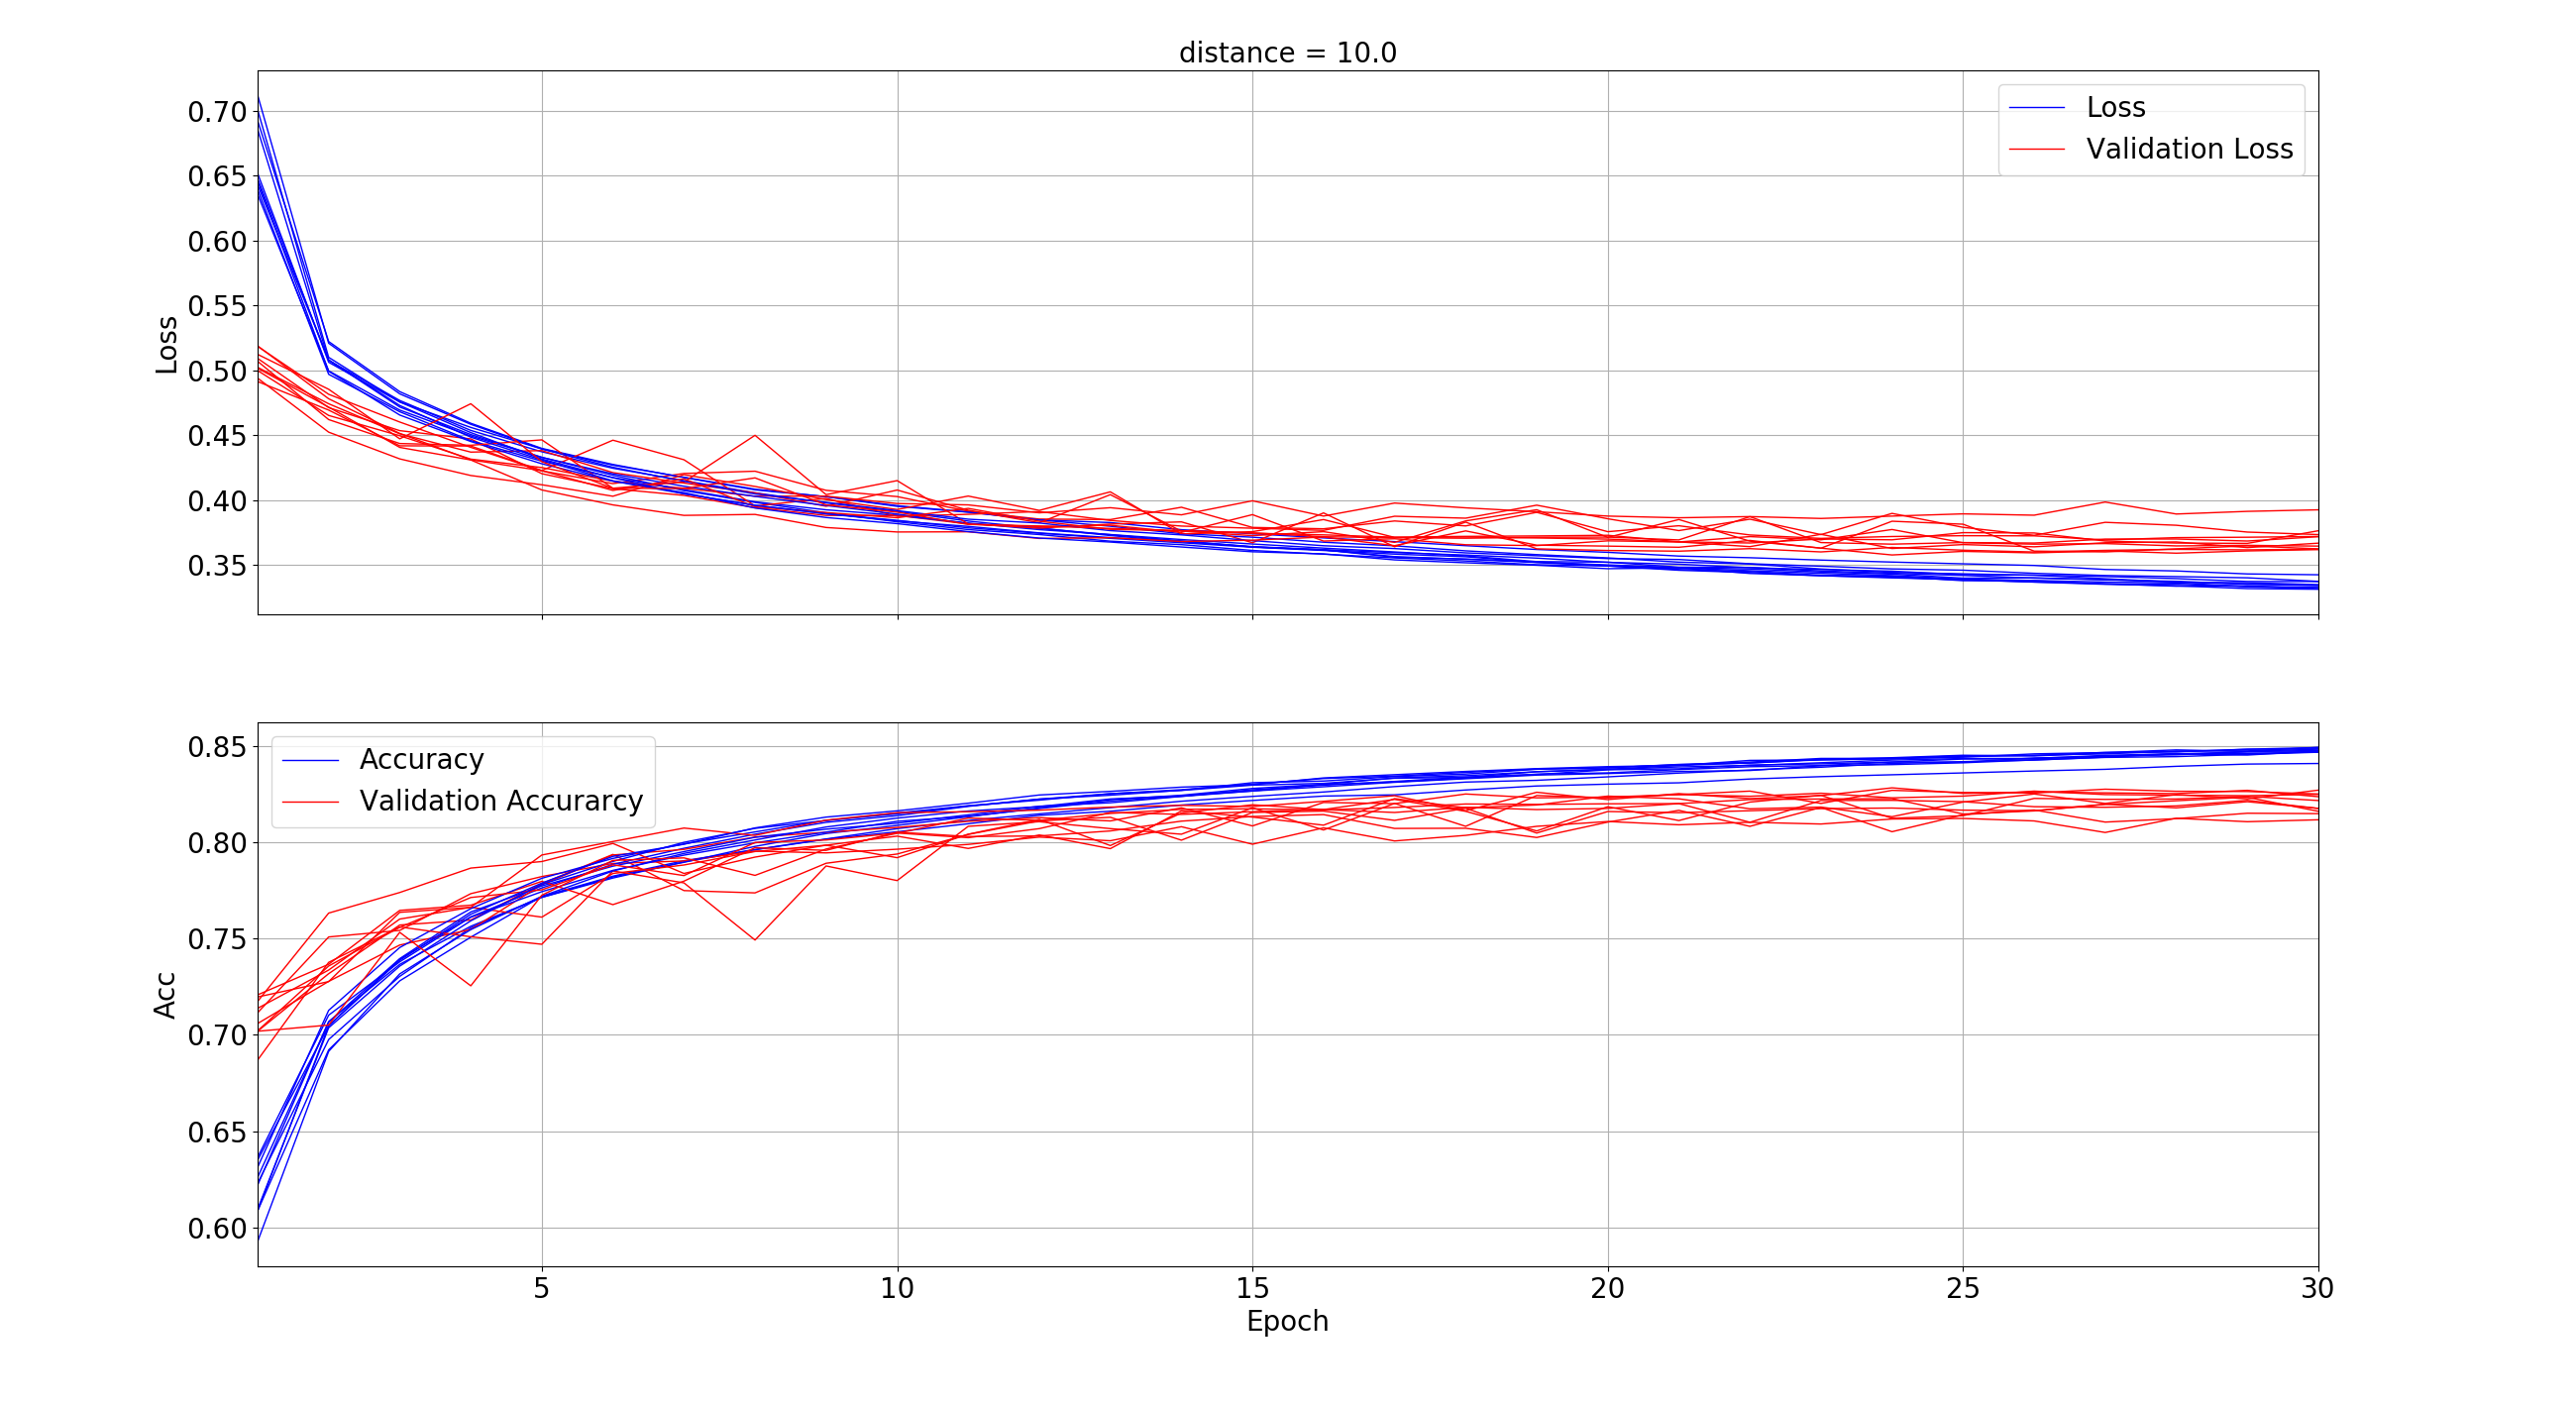

In [26]:
image = Image.open('Loss_plots_distance_10.0_HLVK-dist.png')
image

## Figure 16. Loss plot for distance = 20kpc

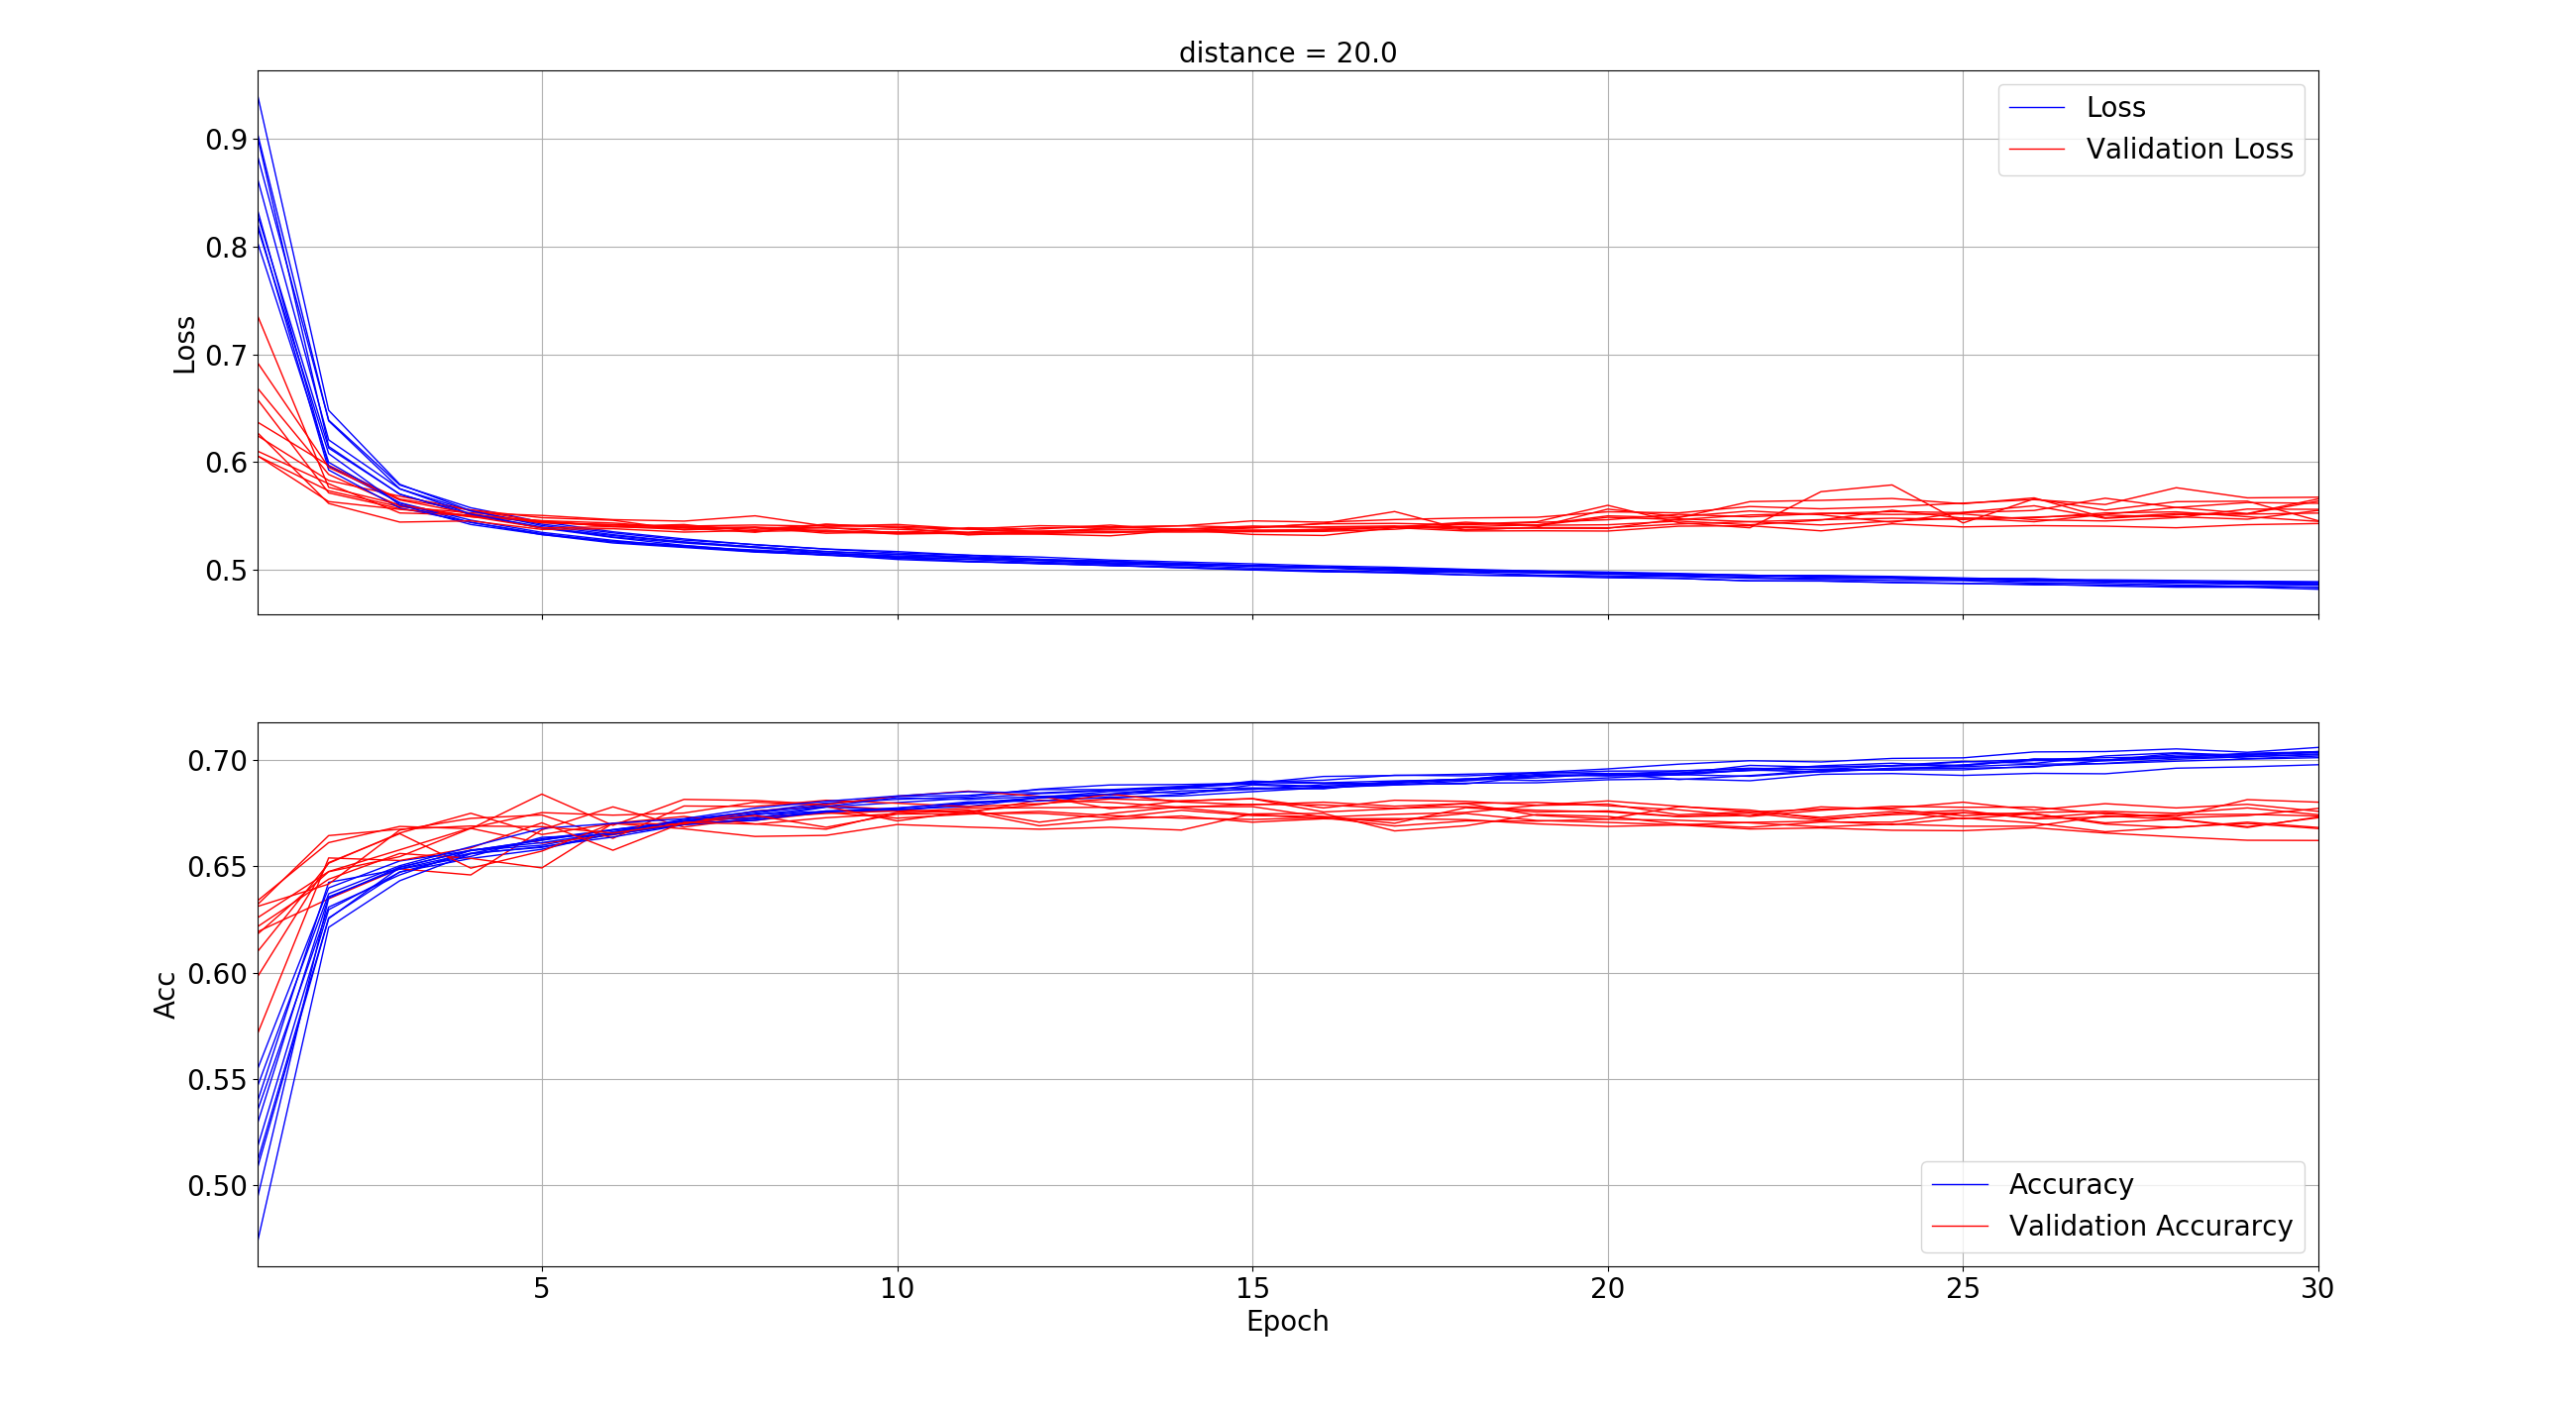

In [27]:
image = Image.open('Loss_plots_distance_20.0_HLVK-dist.png')
image

# Figure 17. Loss plot for distance = 30kpc

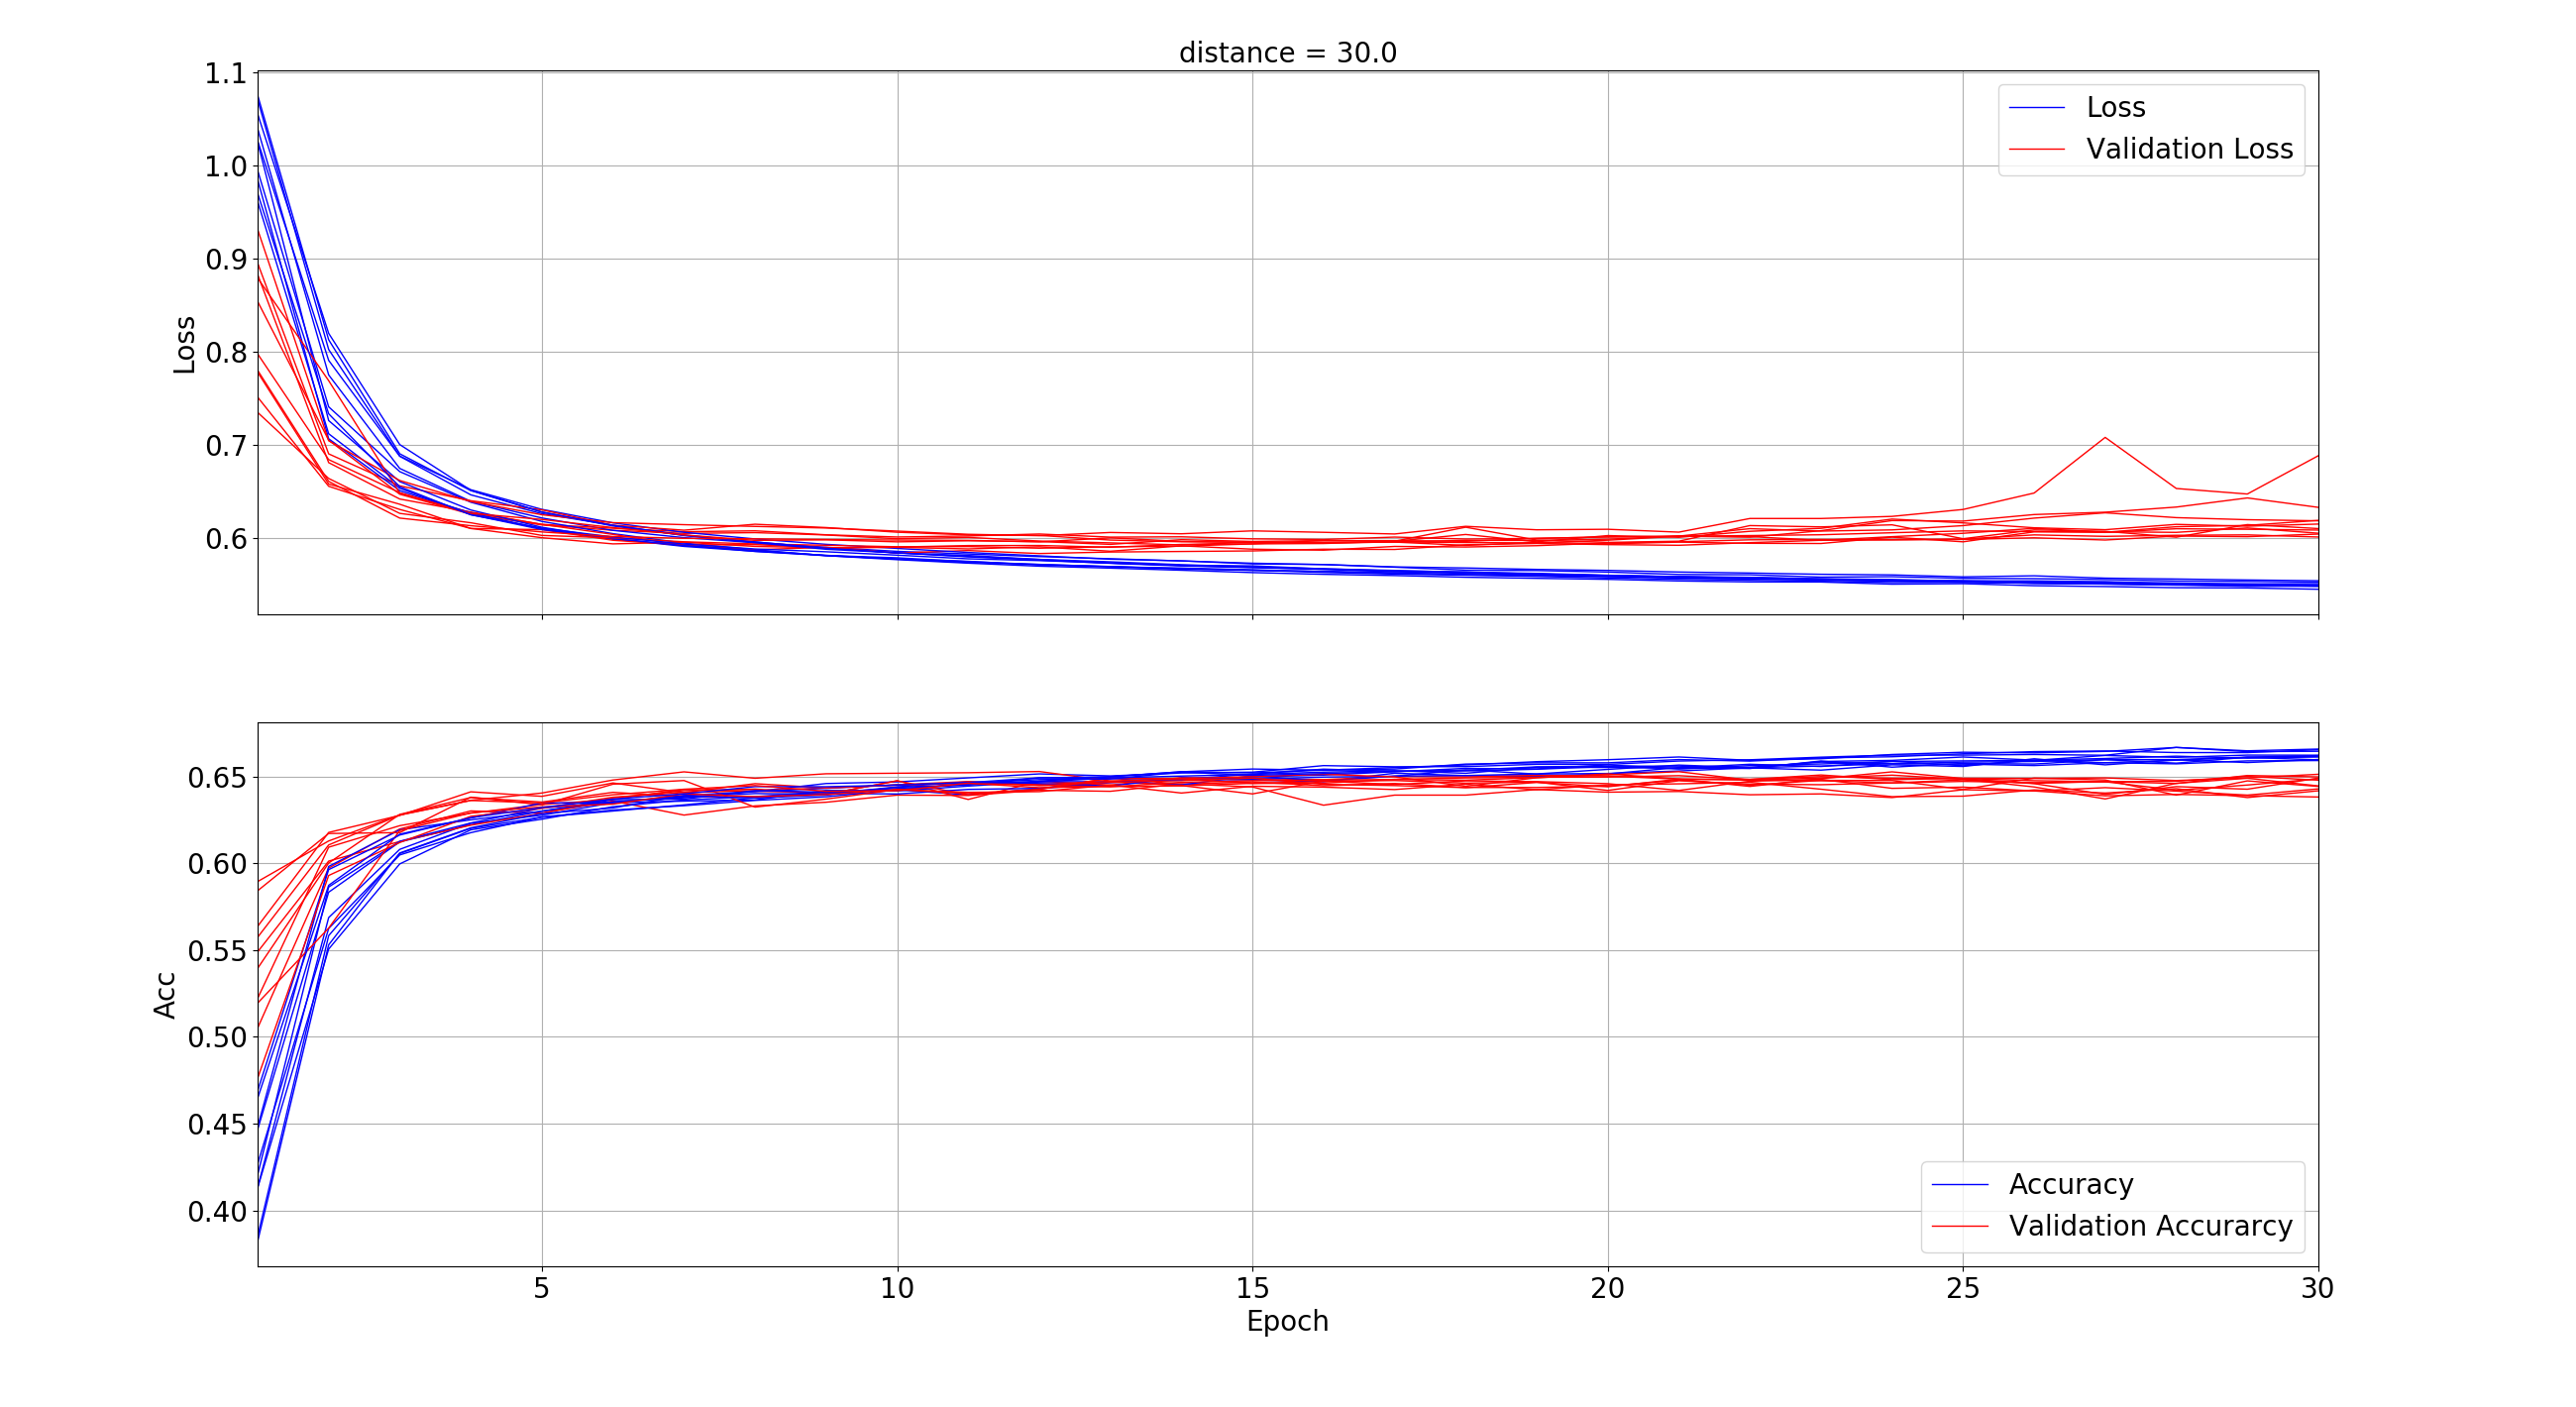

In [28]:
image = Image.open('Loss_plots_distance_30.0_HLVK-dist.png')
image

# Figure 18. Loss plot for distance = 40kpc


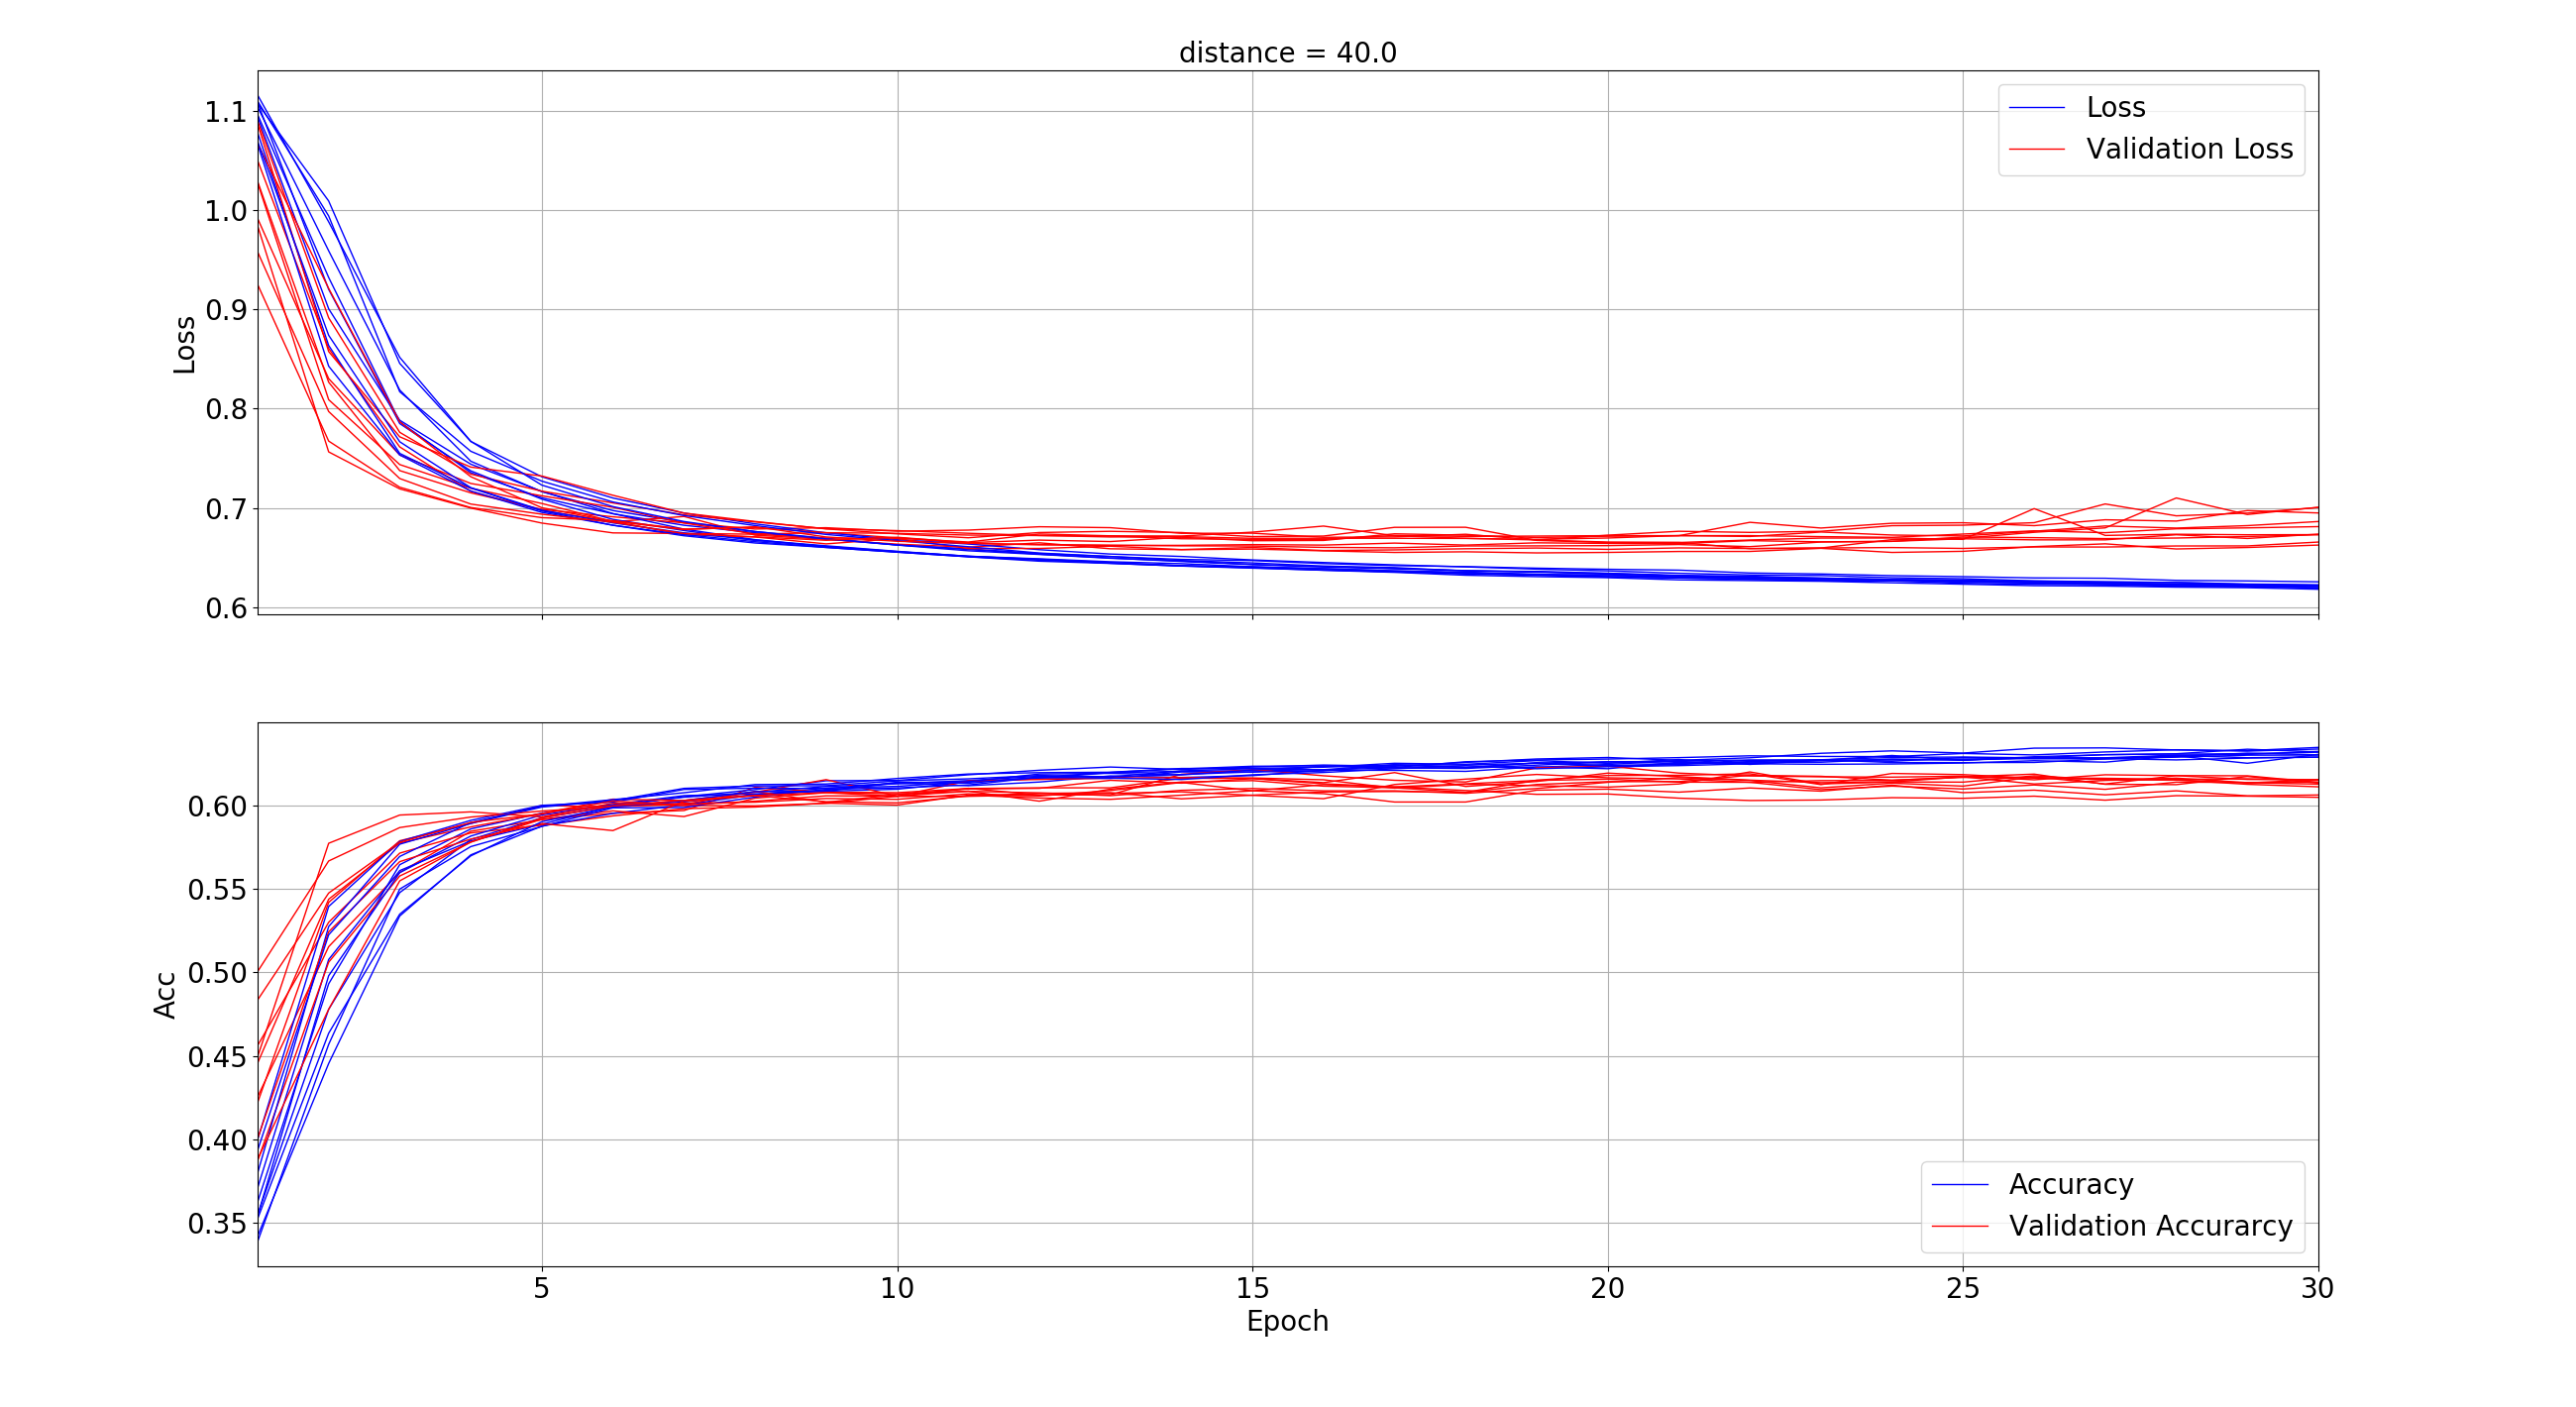

In [29]:
image = Image.open('Loss_plots_distance_40.0_HLVK-dist.png')
image

# Figure 19. Loss plot for distance = 50kpc


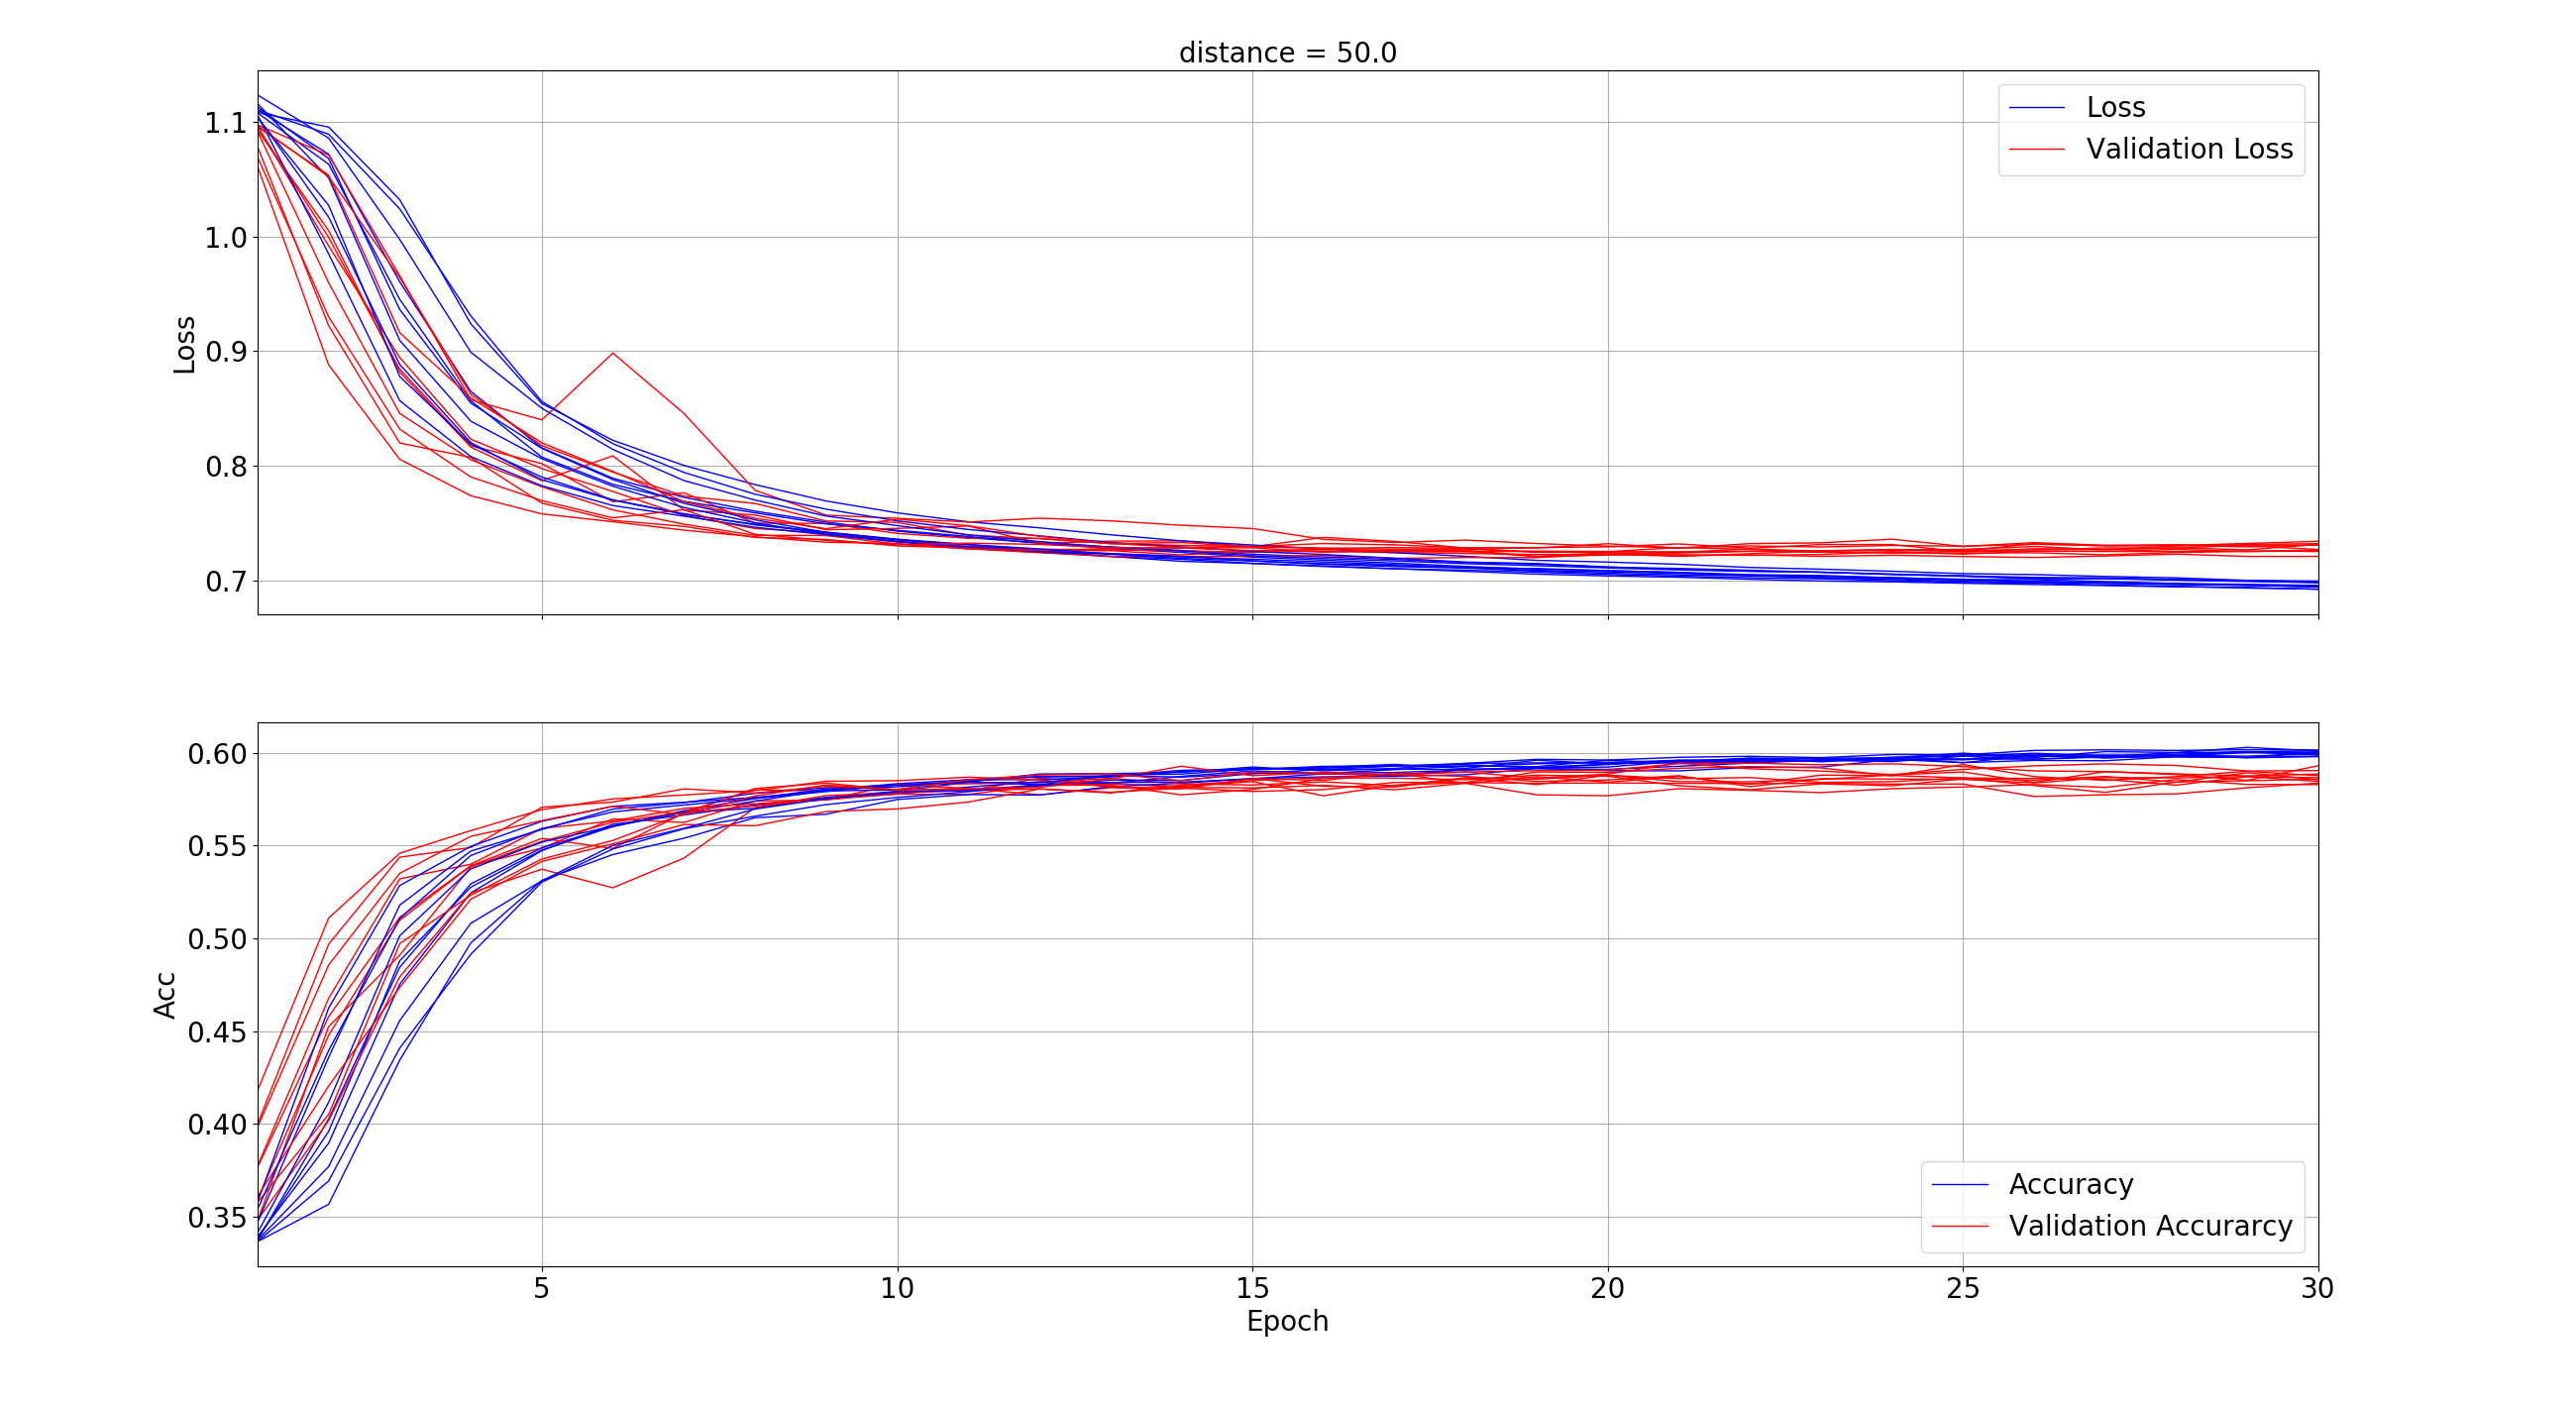

In [30]:
image = Image.open('Loss_plots_distance_50.0_HLVK-dist.png')
image

# Figure 20. Loss plot for distance = 80kpc

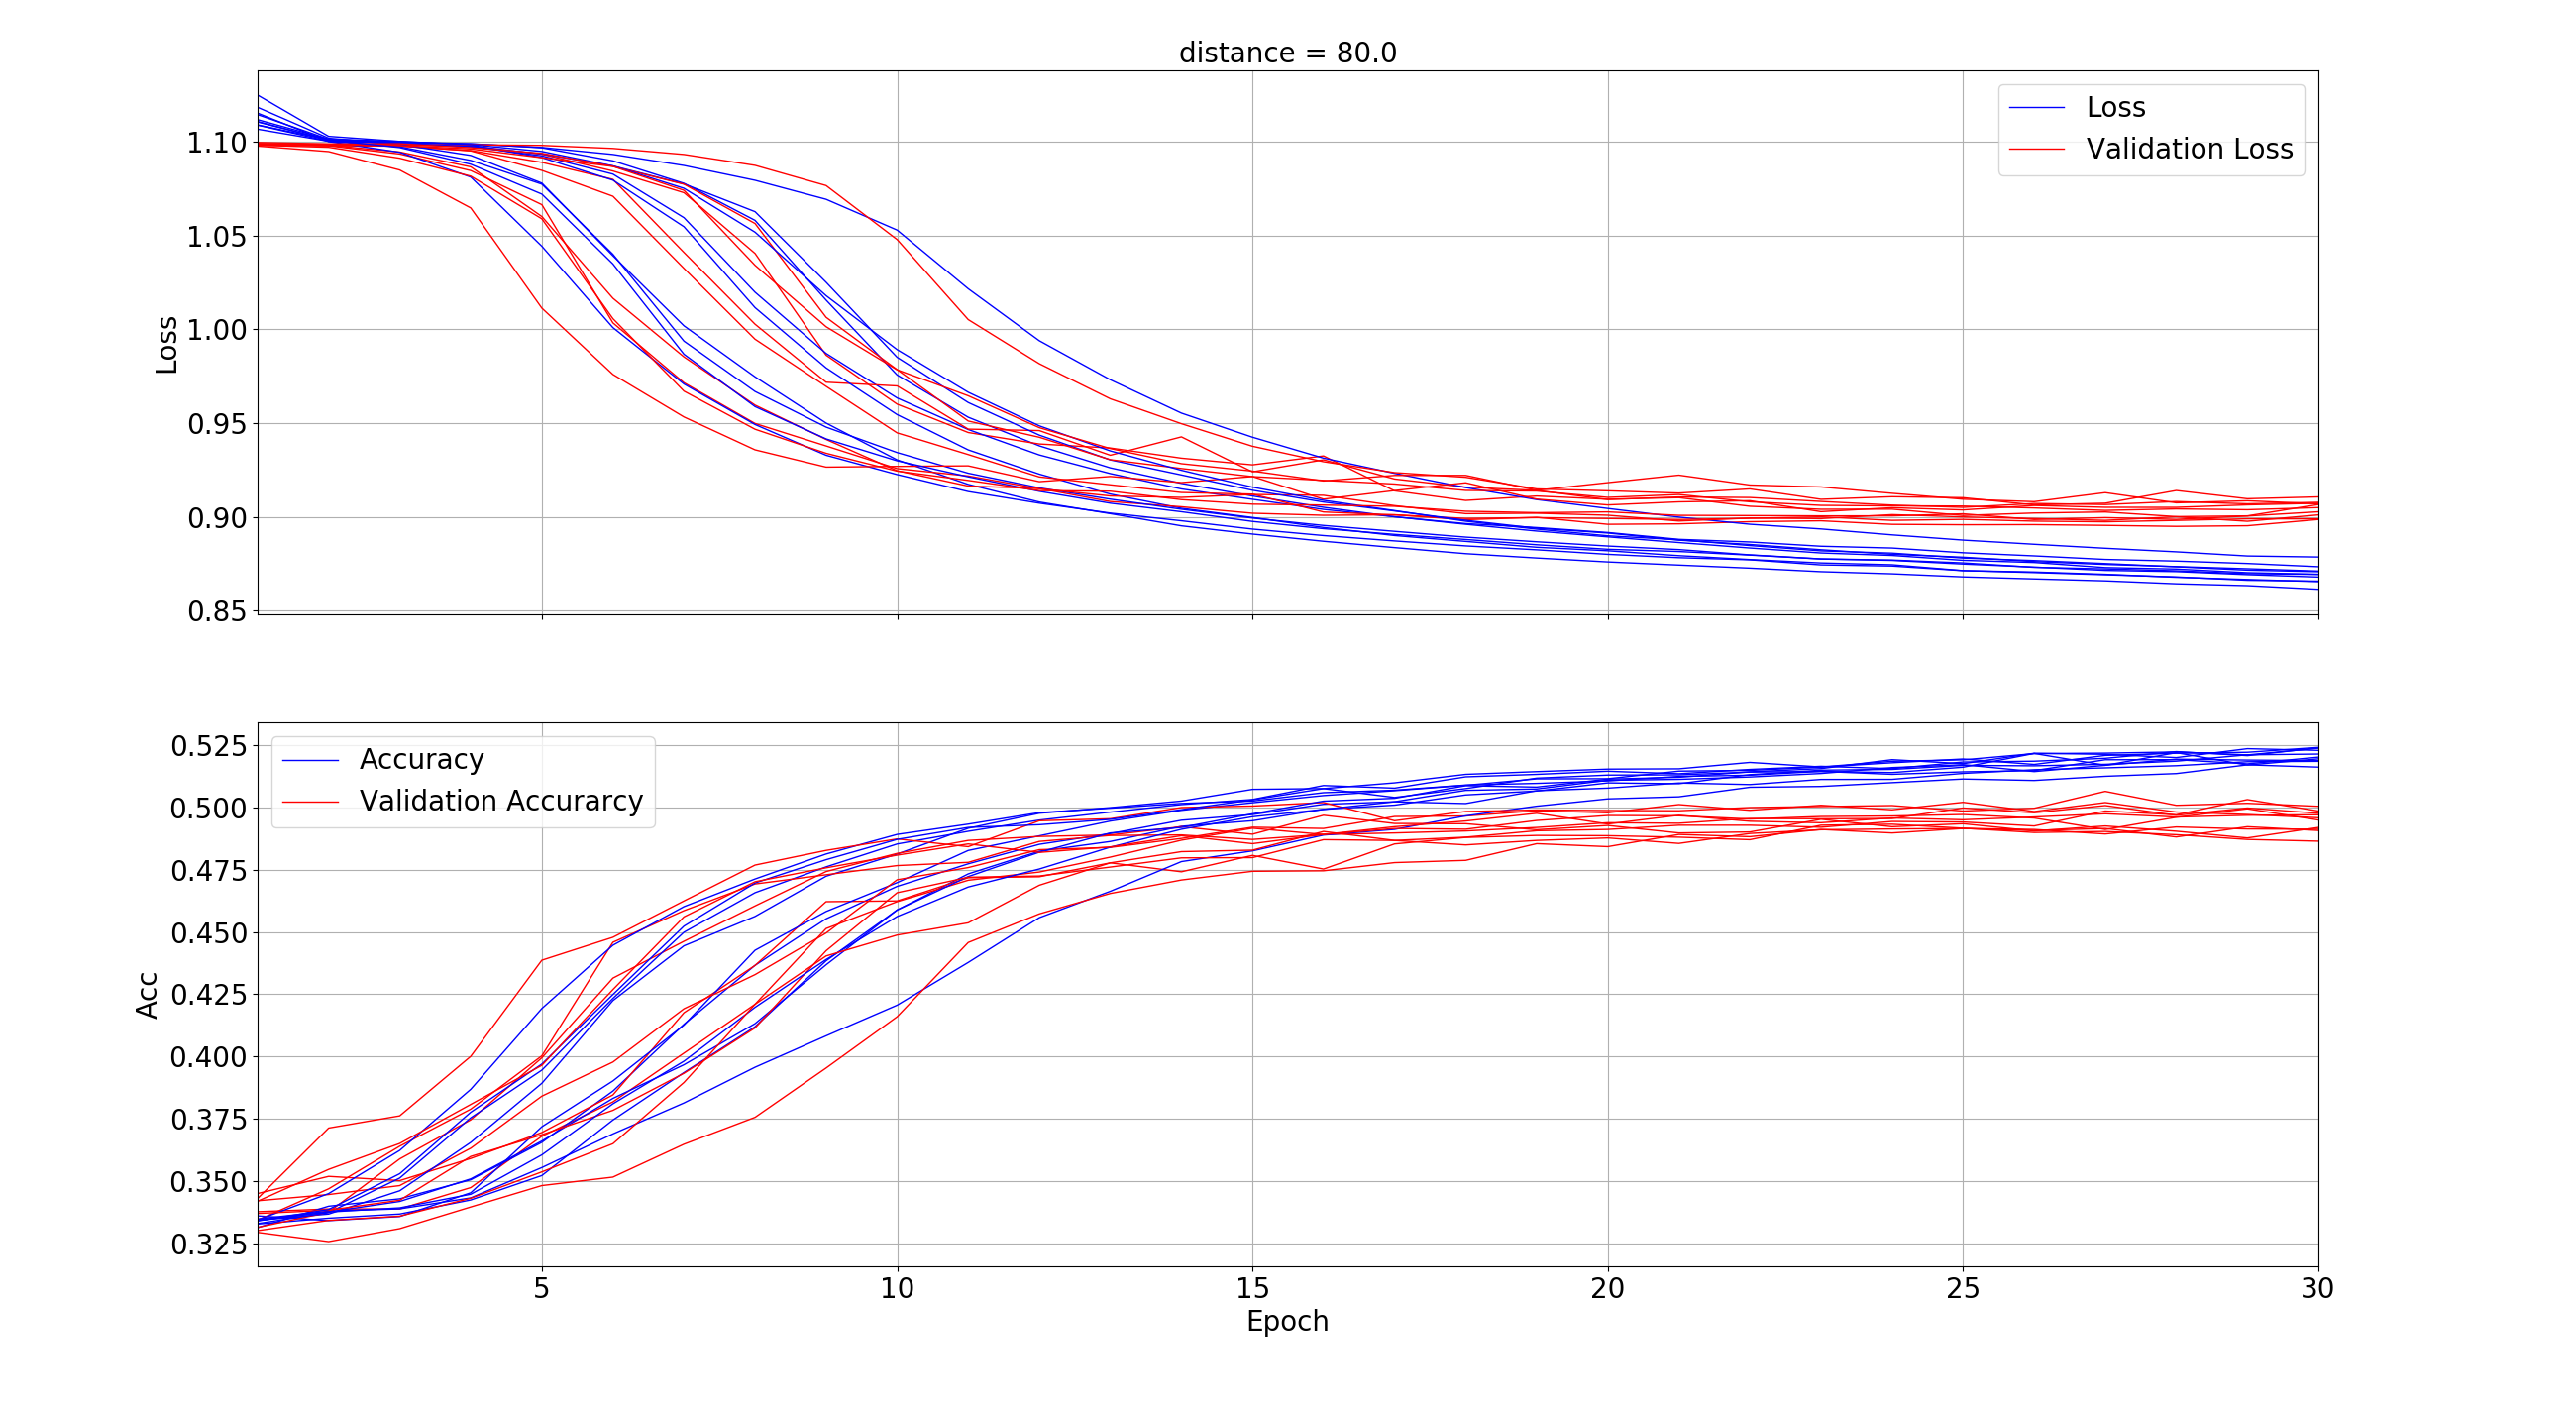

In [31]:
image = Image.open('Loss_plots_distance_80.0_HLVK-dist.png')
image

# Figure 21. Loss plot for distance = 100kpc

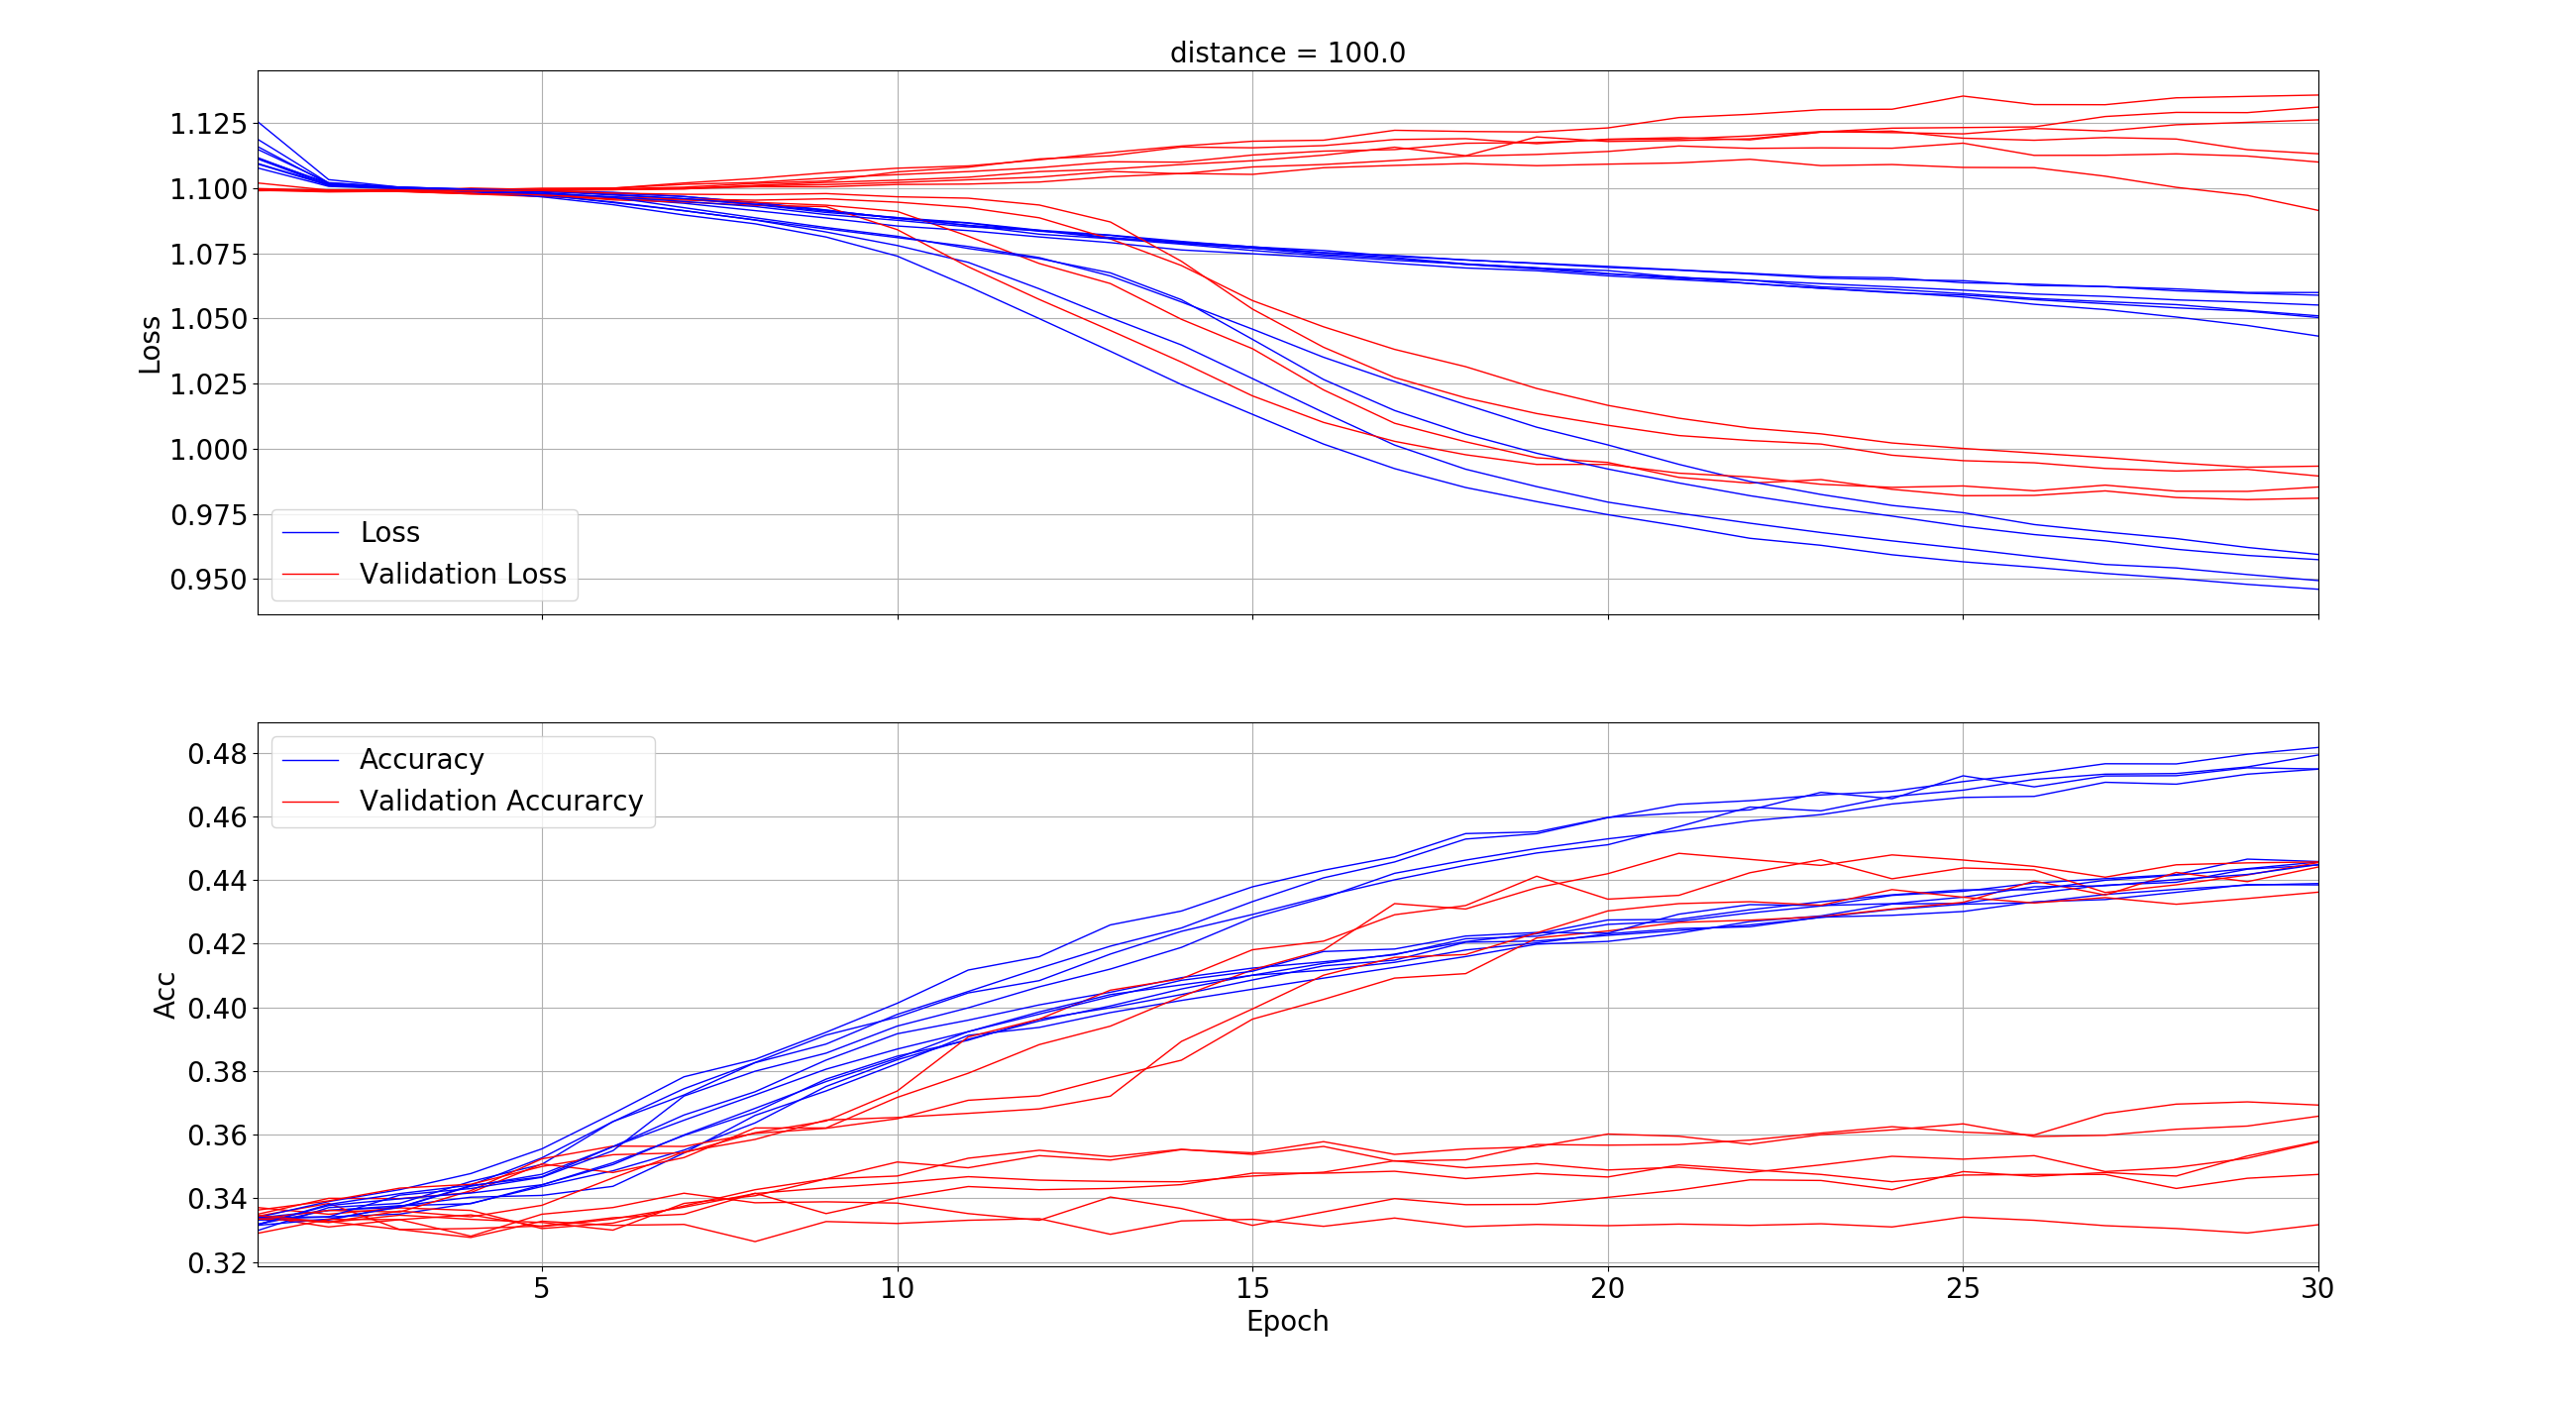

In [32]:
image = Image.open('Loss_plots_distance_100.0_HLVK-dist.png')
image

# Figure 22. Loss plot for distance = 150kpc

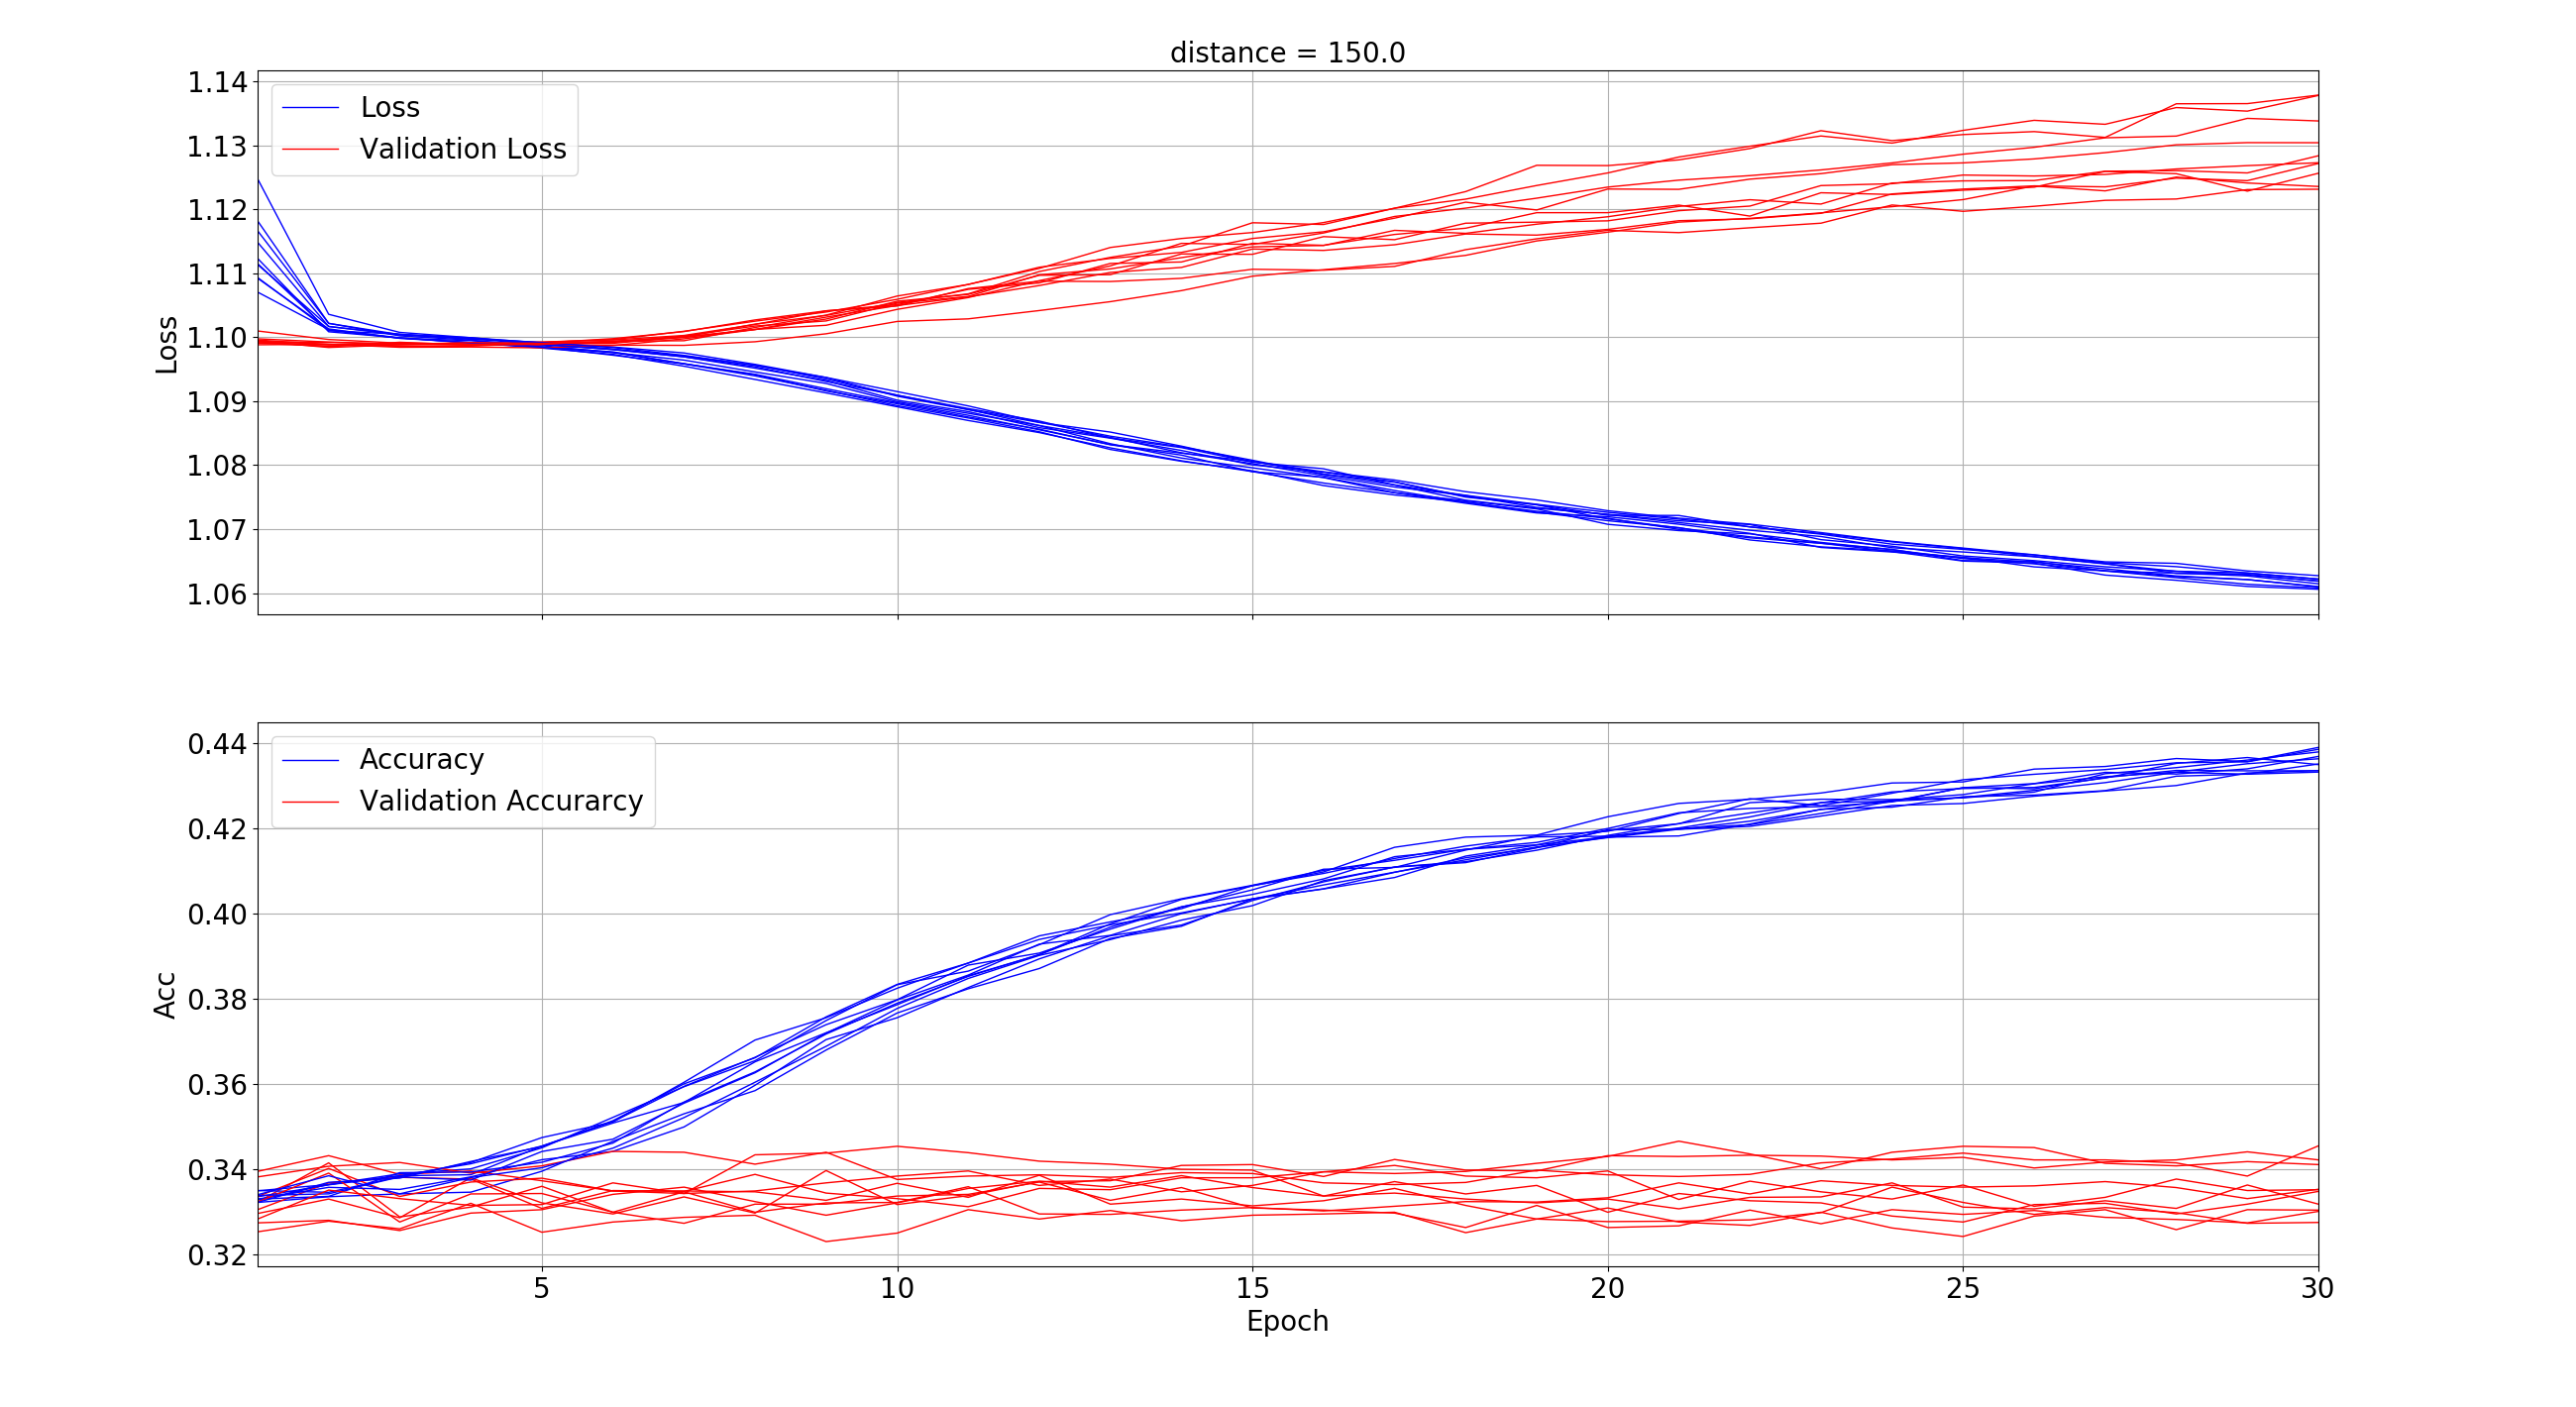

In [33]:
image = Image.open('Loss_plots_distance_150.0_HLVK-dist.png')
image

# Figure 23. Loss plot for distance = 200kpc

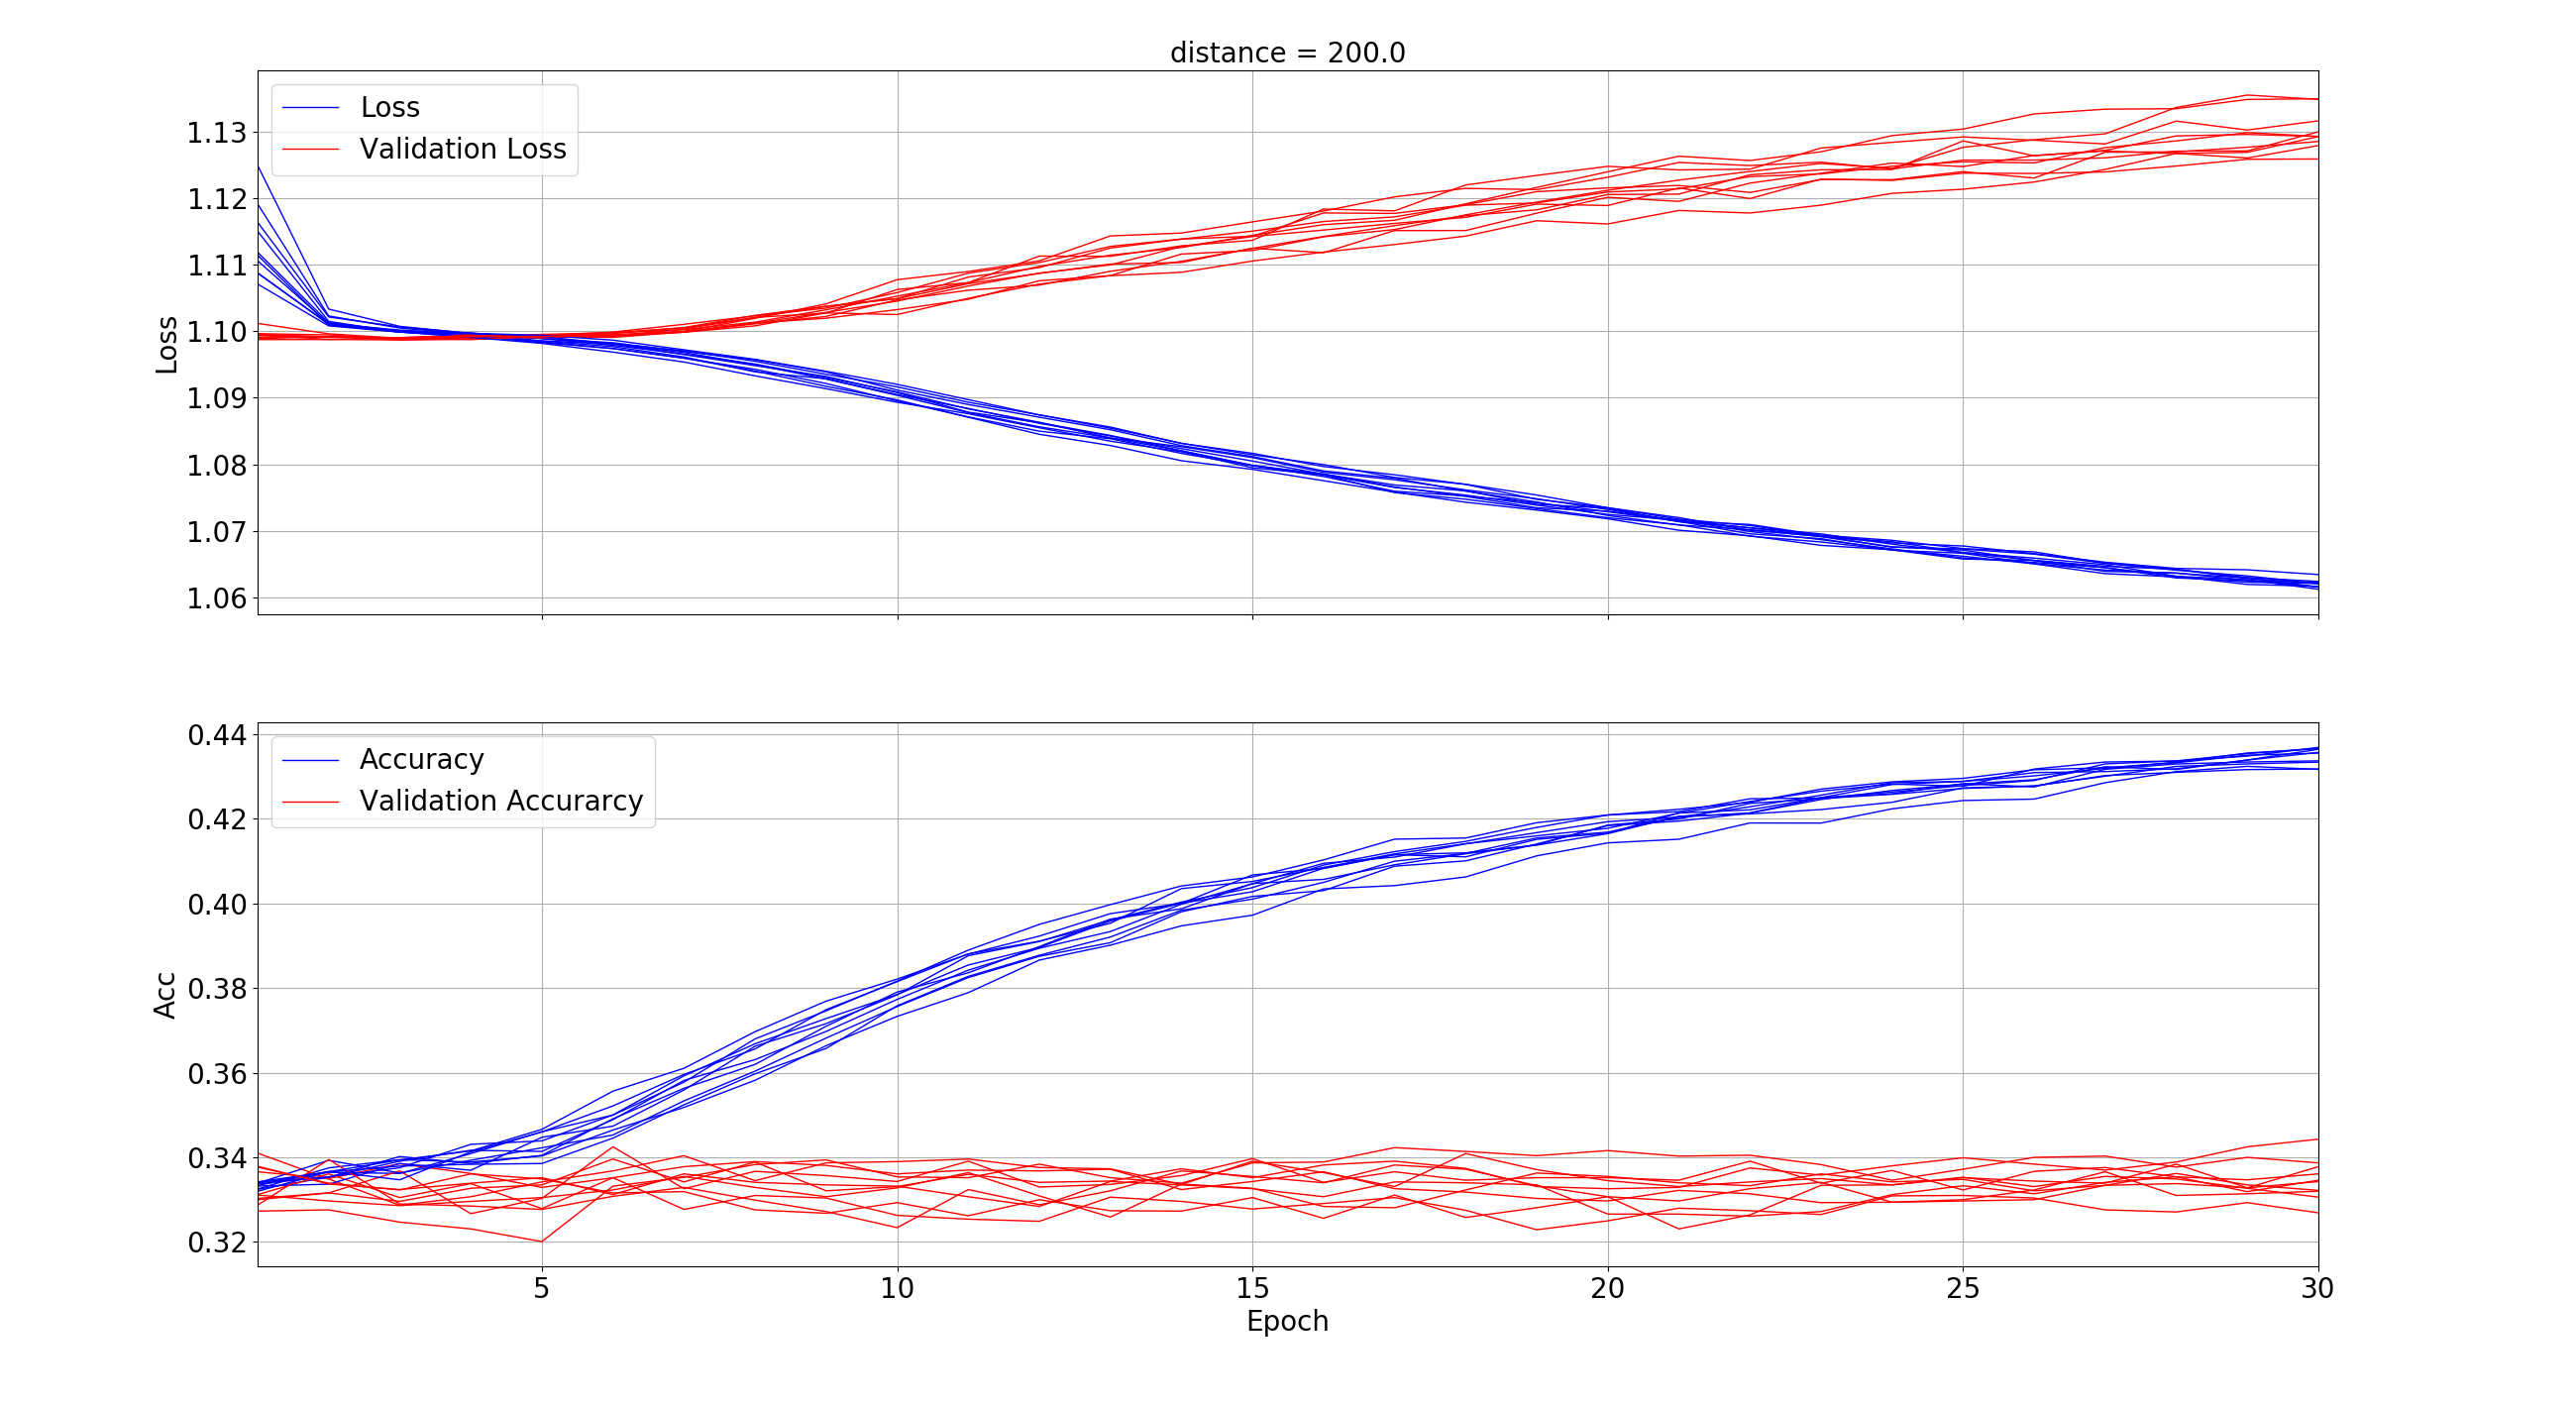

In [34]:
image = Image.open('Loss_plots_distance_200.0_HLVK-dist.png')
image